<h1><font color='green'>Library</font></h1>

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<h1><font color='green'>Load Data...</font></h1>

In [4]:
data = pd.read_csv("05.Normalized Mental Health.csv").drop(['Unnamed: 0'], axis = 1)
data

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,...,live_in_Germany,live_in_Netherlands,live_in_United Kingdom,live_in_United States of America,work_at_Australia,work_at_Canada,work_at_Germany,work_at_Netherlands,work_at_United Kingdom,work_at_United States of America
0,0.0,-0.531153,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,-0.571808,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,-0.571808,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,-0.531153,1.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,-0.571808,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1.0,-0.531153,1.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1429,1.0,-0.531153,1.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1430,0.0,-0.314326,1.0,1.0,1.0,1.0,2.0,-2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1431,0.0,-0.314326,0.0,2.0,0.0,1.0,2.0,-2.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
data1 = data.copy()

<h1><font color='green'>Clustering by KMeans</font></h1>

<h4>checking for the best cluster number</h4>

In [6]:
clusters = 15
inertias = []
for cluster in range(2, clusters+1):
    km = KMeans(n_clusters = cluster, random_state = 2)
    y = km.fit_predict(data1)
    inertias.append(km.inertia_)

<h3><font color='red'>checked by Elbow Method </font></h3>

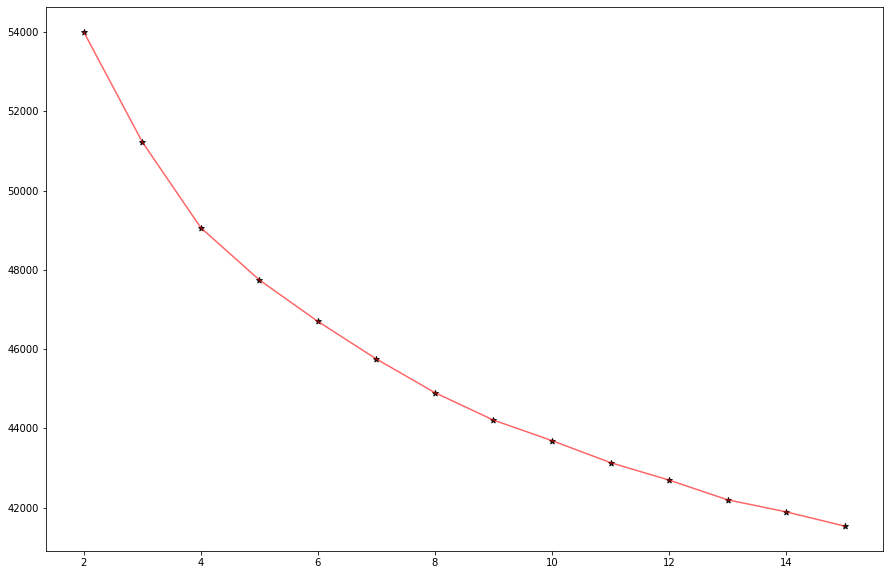

In [7]:
plt.figure(figsize = (15, 10))
plt.scatter(range(2, clusters+1), inertias, marker = '*', c = 'k',alpha = 0.9)
plt.plot(range(2, clusters+1), inertias, c = 'r', alpha = 0.6)

<h3><font color='red'>checked by Silhouette Method</font></h3>

<h4>silhouette_score and silhouette_samples</h4>

score : 0.080795570418791
score : 0.07515008590171793
score : 0.0682799103857313
score : 0.05968886203196573
score : 0.058302227949252945
score : 0.05924570198106087
score : 0.05317968106763645
score : 0.0543311521748055
score : 0.05266369882943347
score : 0.05103234433603158
score : 0.05211558799335569
score : 0.05115358950203034
score : 0.051244731550867194
score : 0.04931443139345874


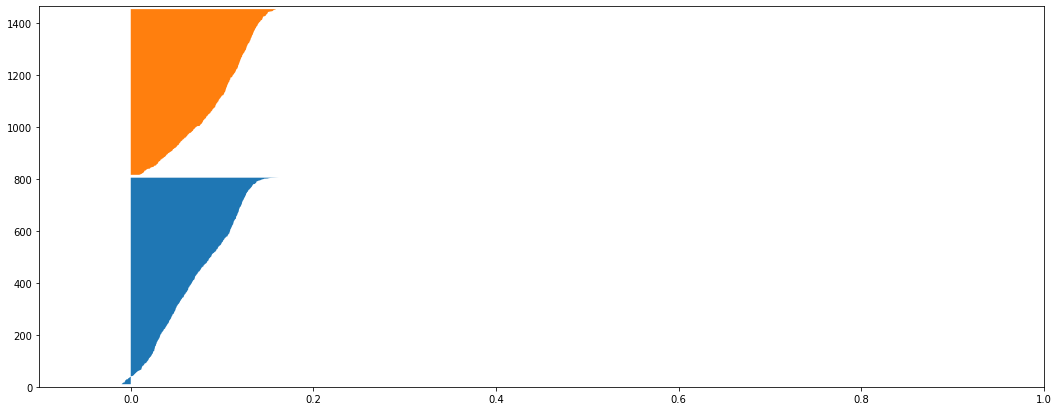

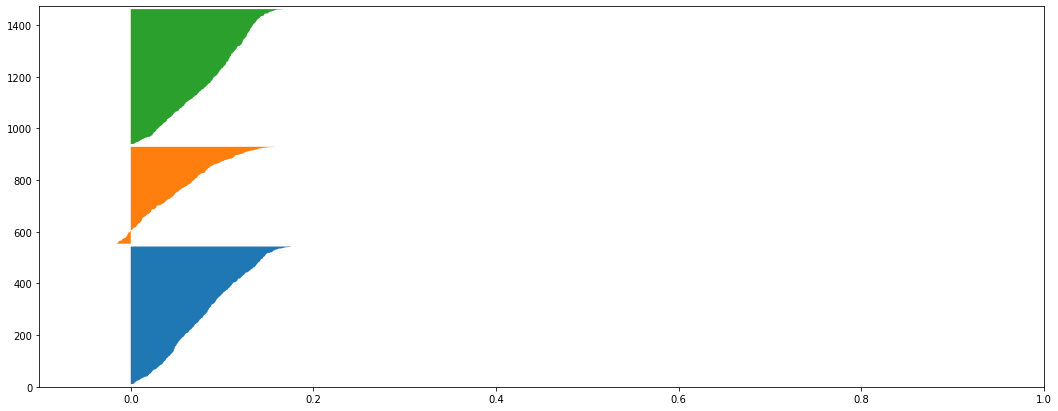

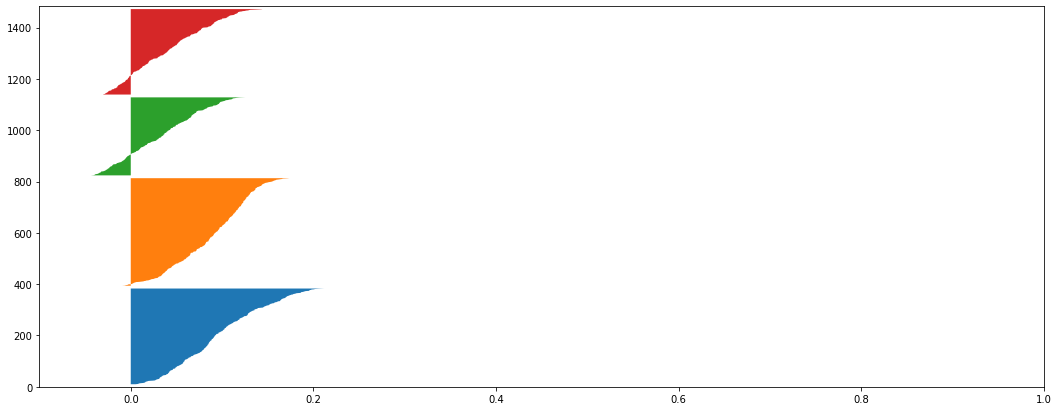

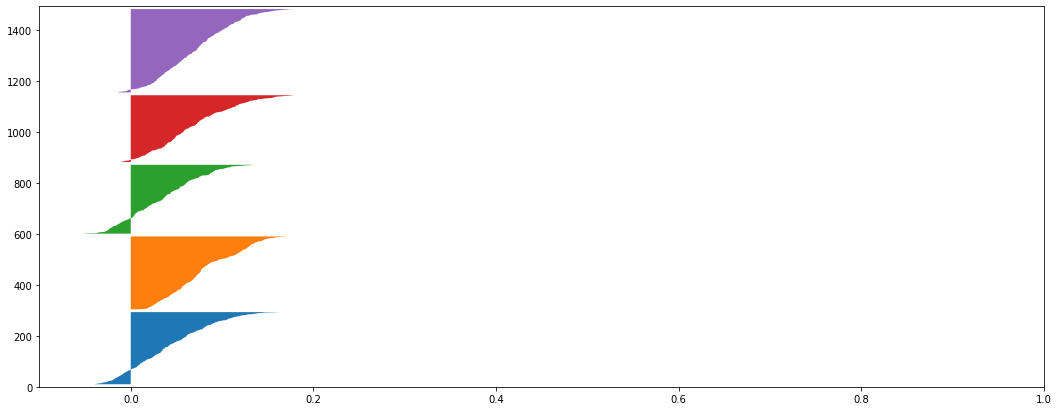

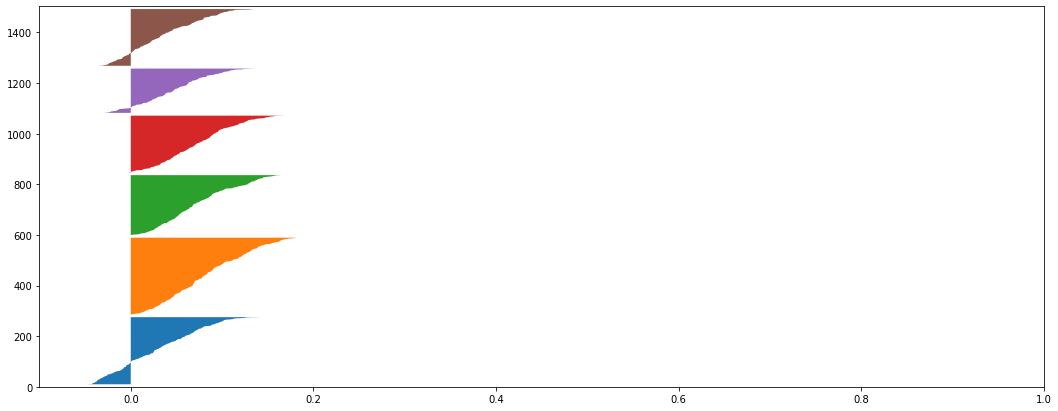

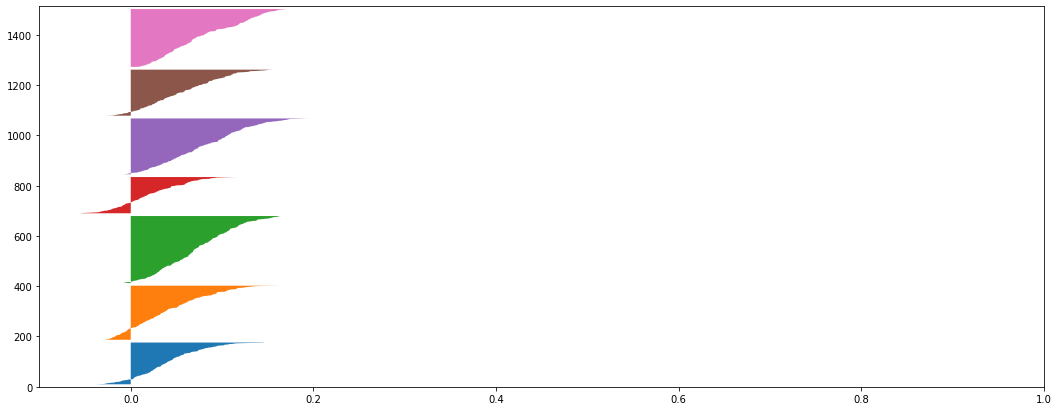

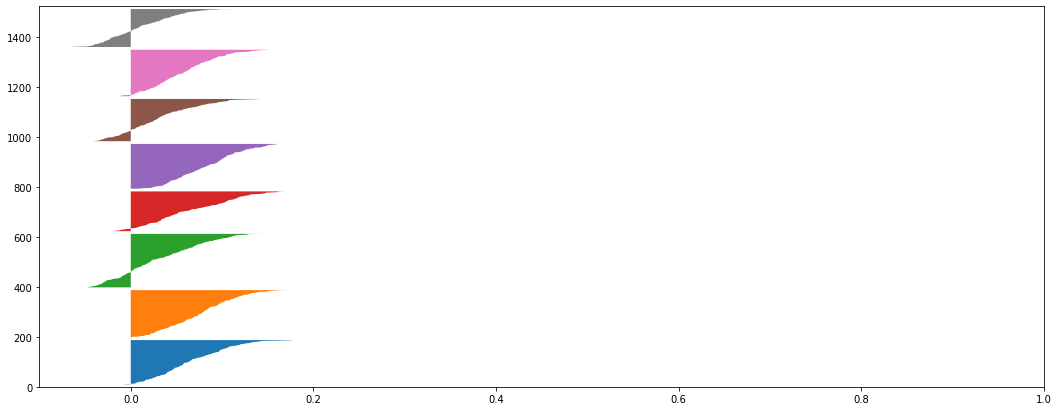

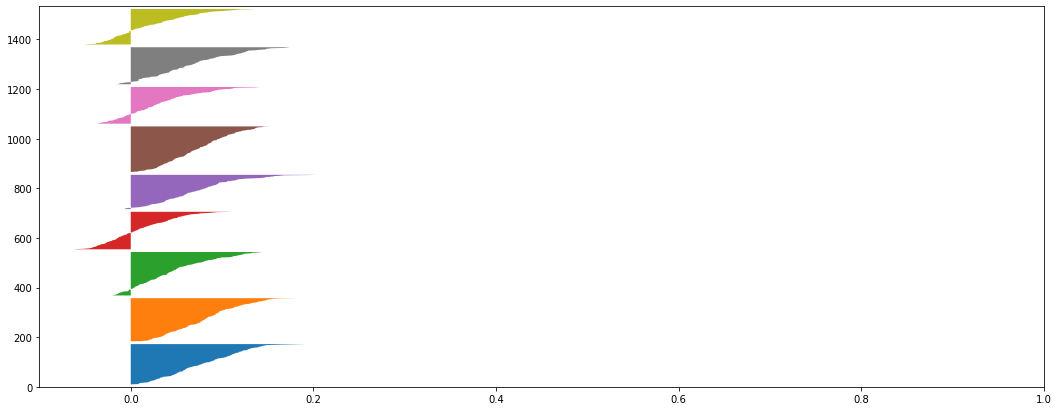

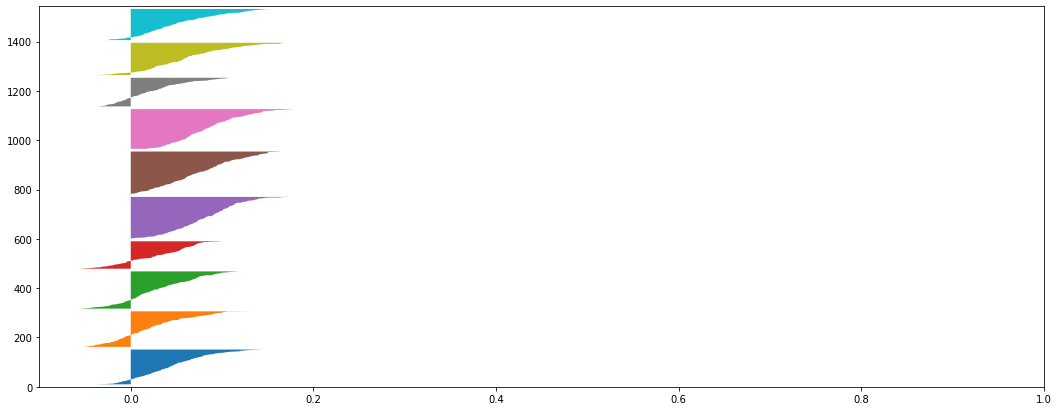

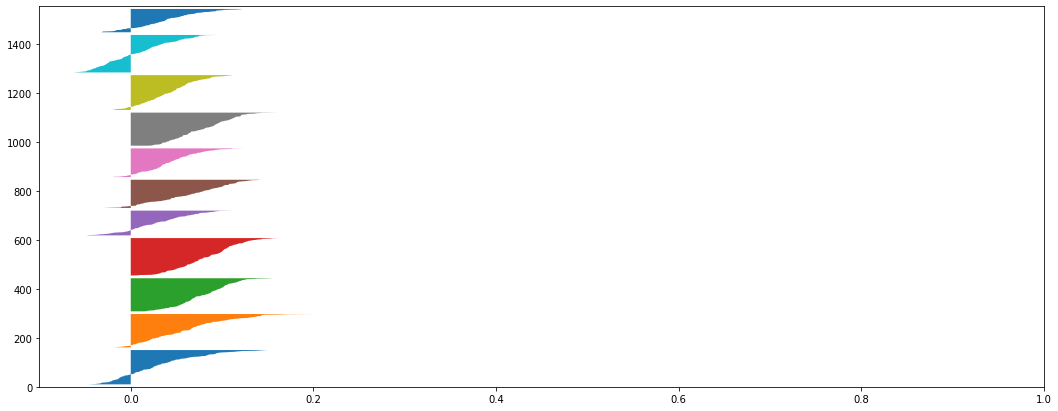

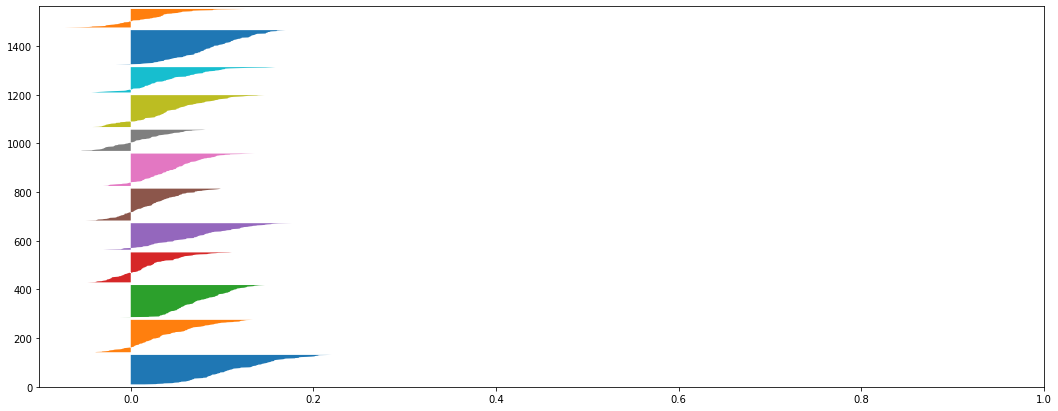

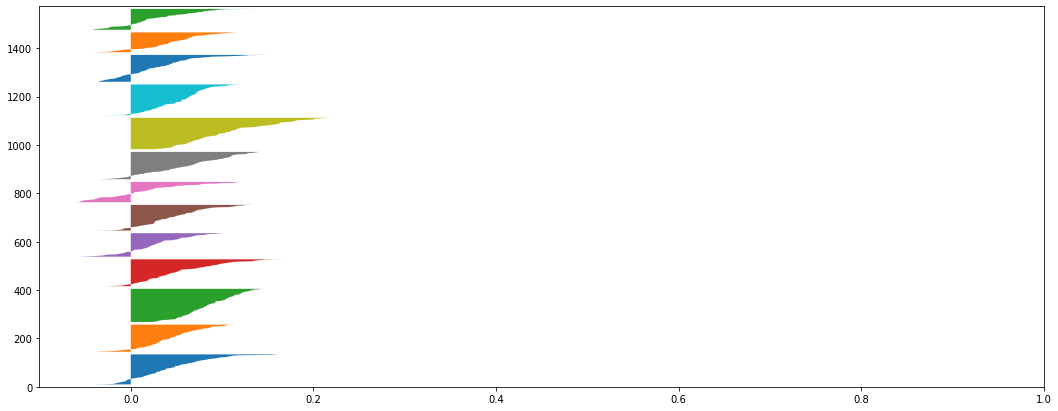

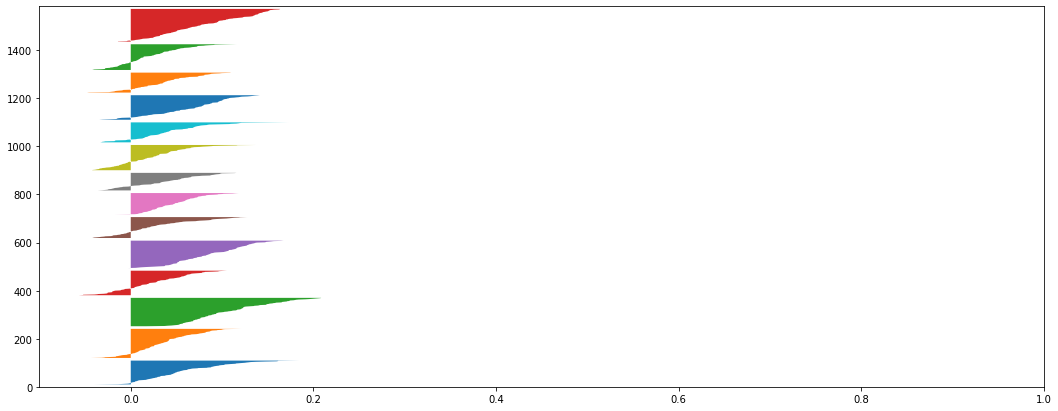

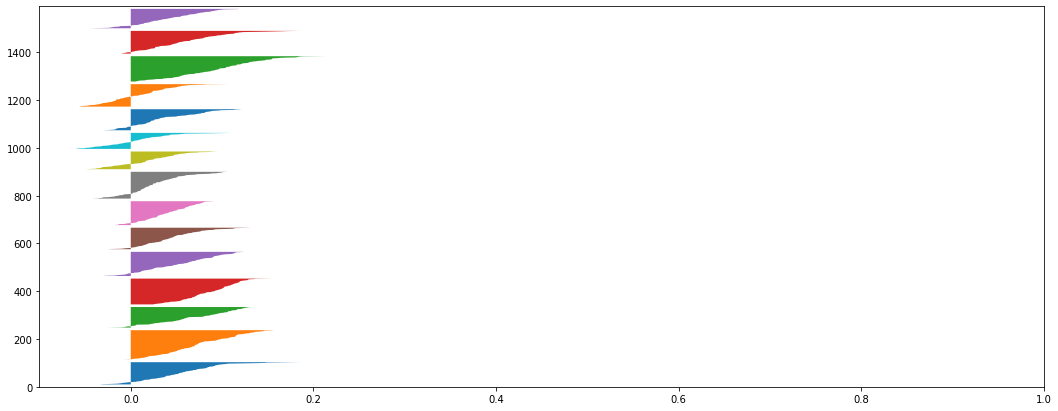

In [8]:
clusters = 15
for cluster in range(2, clusters+1):
    km = KMeans(n_clusters = cluster, random_state = 1)
    y = km.fit_predict(data1)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data1) + (cluster + 1) * 10])
    
    score = silhouette_score(data1, y)
    print('score :',score)

    sil_sample = silhouette_samples(data1, y)
    y_lower = 10
    for i in range(cluster):
        i_sil_sample = sil_sample[y==i]
        i_sil_sample.sort()
        y_upper = y_lower + i_sil_sample.shape[0]
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,i_sil_sample)
        y_lower = y_upper + 10

<h1><font color='green'>Clustering by KModes</font></h1>

<h4>checking for the best cluster number</h4>

In [9]:
clusters = 15
costs = []
for cluster in range(2, clusters+1):
    km2 = KModes(n_clusters = cluster, init='Cao', random_state = 5)
    y = km2.fit_predict(data1)
    costs.append(km2.cost_)

<h3><font color='red'>checked by Elbow Method</font></h3>

In [10]:
def z_score_norm(x):
    return (x-x.mean())/x.std()

In [11]:
def min_max_norm(x,new_min,new_max):
    min_max=(((x-x.min())/(x.max()-x.min()))*(new_max-new_min))+(new_min)
    return min_max

In [12]:
inertias = min_max_norm(np.array(inertias), 0, 10)
costs = min_max_norm(np.array(costs), 0, 10)

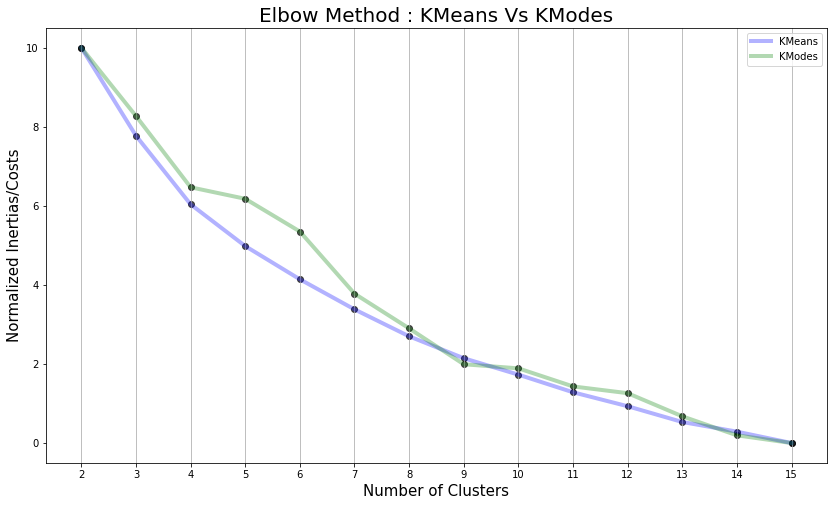

In [13]:
plt.figure(figsize = (14, 8))
plt.grid(axis='x')
plt.xticks(range(2, clusters+1))
plt.title('Elbow Method : KMeans Vs KModes', fontsize = 20)
plt.xlabel('Number of Clusters', fontsize = 15)
plt.ylabel('Normalized Inertias/Costs', fontsize = 15)

plt.scatter(range(2, clusters+1), inertias, c = 'k',alpha = 0.65)
plt.plot(range(2, clusters+1), inertias, c = 'b', alpha = 0.3, linewidth = 4, label = 'KMeans')

plt.scatter(range(2, clusters+1), costs, c = 'k',alpha = 0.65)
plt.plot(range(2, clusters+1), costs, c = 'g', alpha = 0.3, linewidth = 4, label = 'KModes')

plt.legend()

plt.savefig('g05.jpg', bbox_inches = 'tight', facecolor='white')

<h3><font color='red'>checked by Silhouette Method</font></h3>

score : 0.060808076062704566
score : 0.036342264442298114
score : 0.02841455286629888
score : 0.0239909434228744
score : 0.02219798486908399
score : 0.01492844989500807
score : 0.010899609071758659
score : 0.008244762377949005
score : 0.00783168130889683
score : 0.008423317526069849
score : 0.005709151551094749
score : 0.0030421751646015514
score : 0.0022356905599597993
score : -0.0017855361503157617


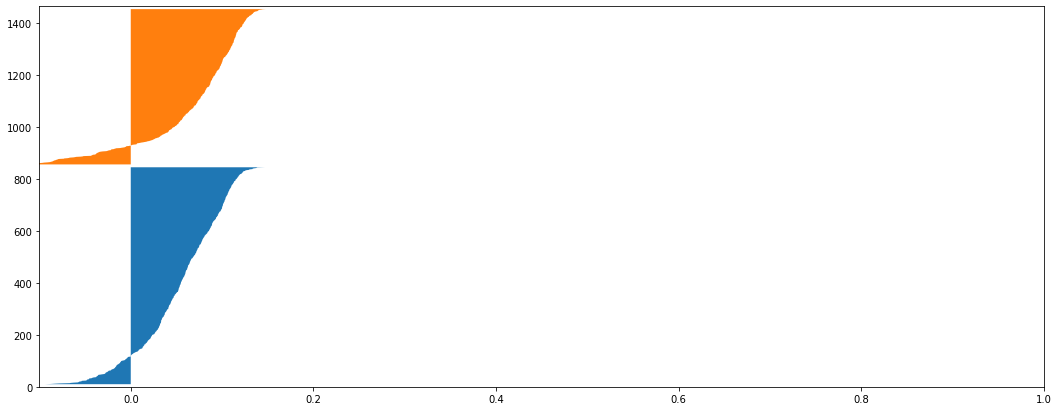

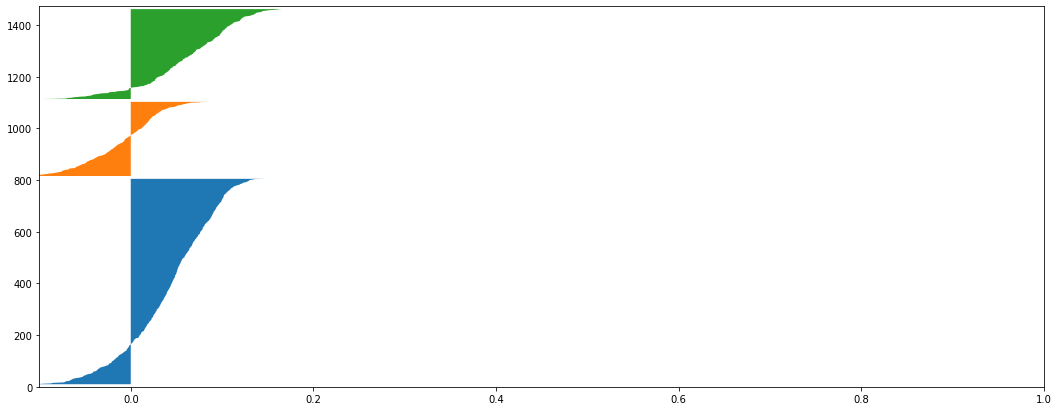

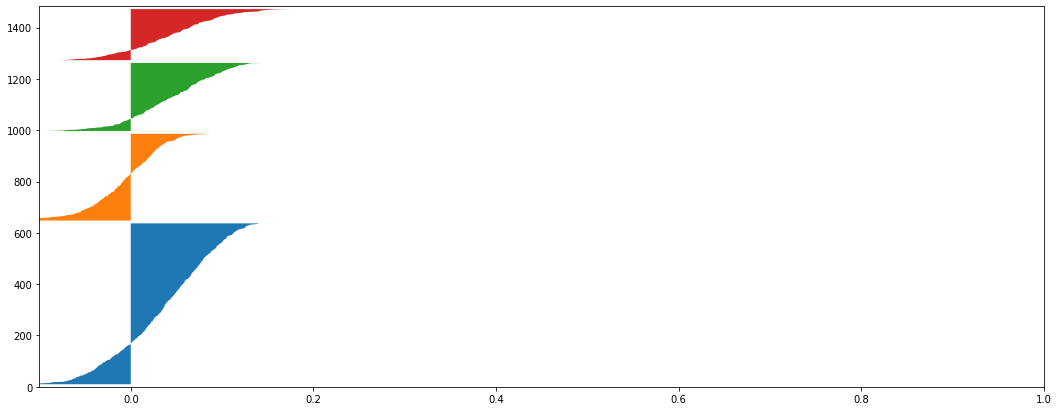

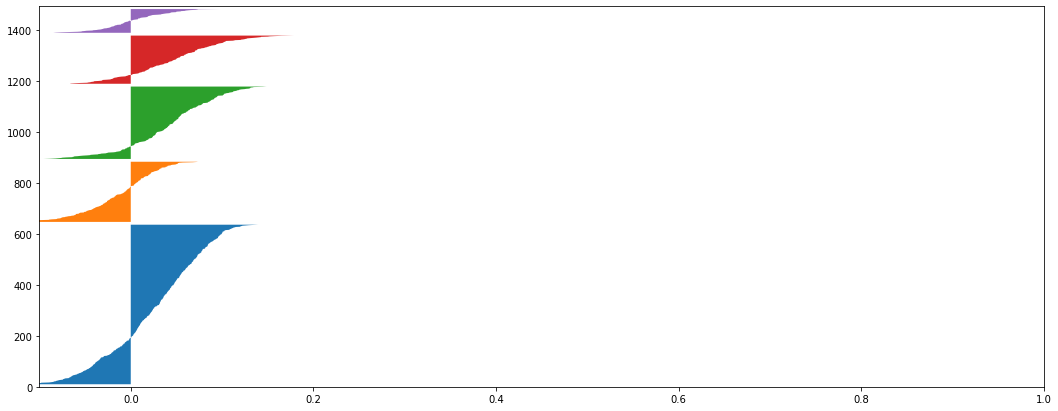

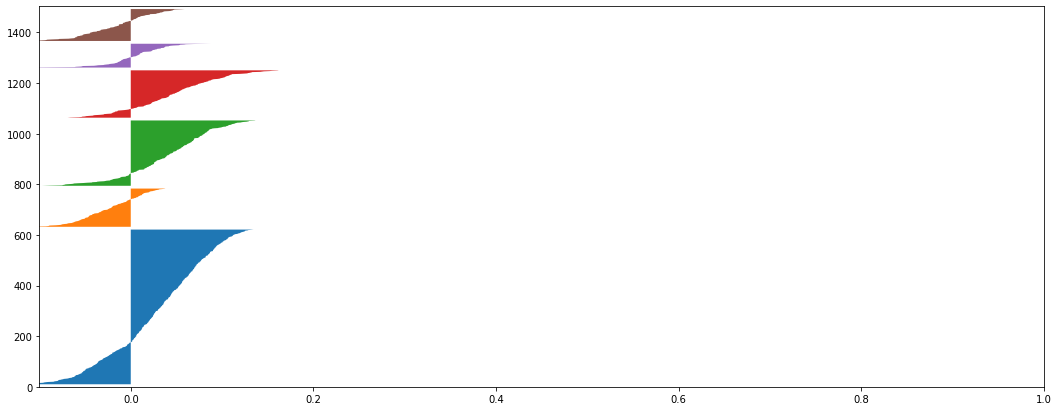

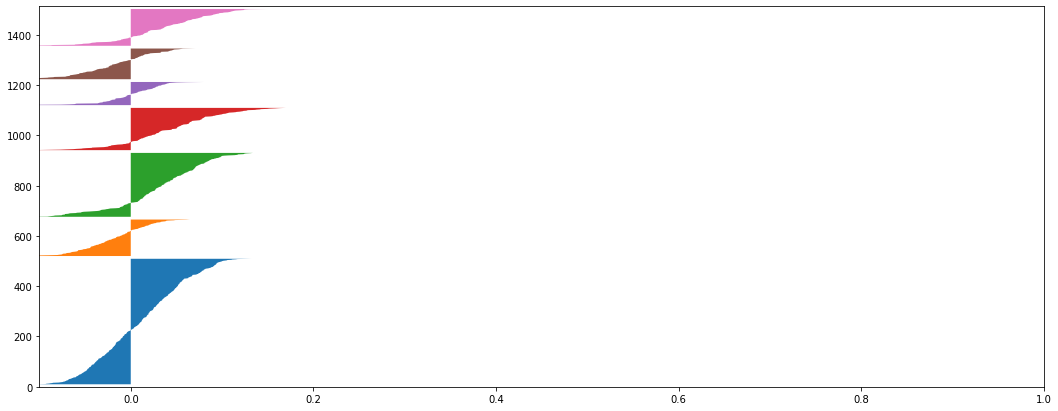

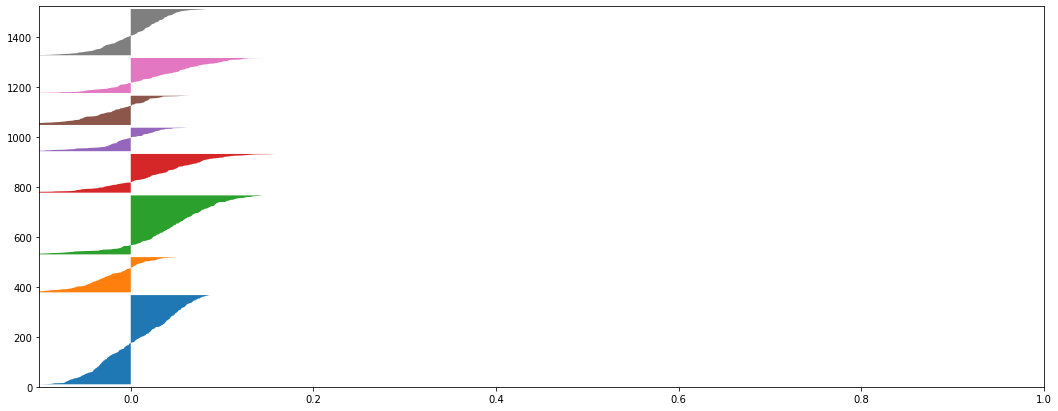

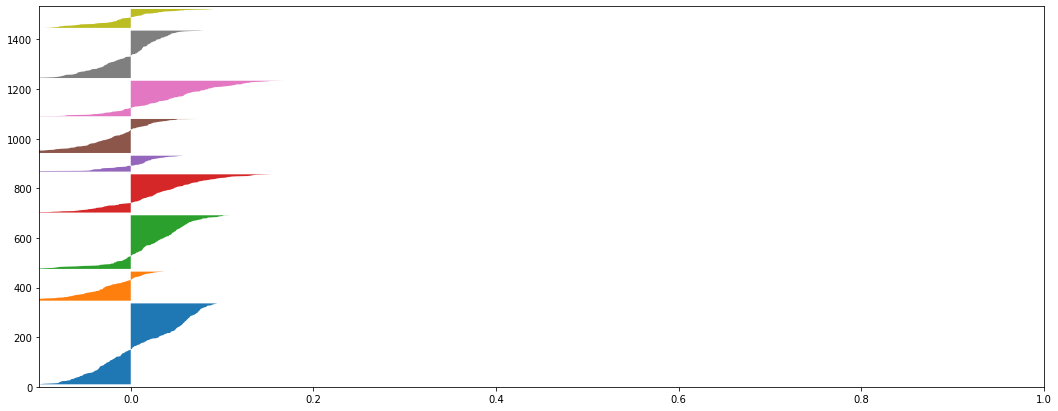

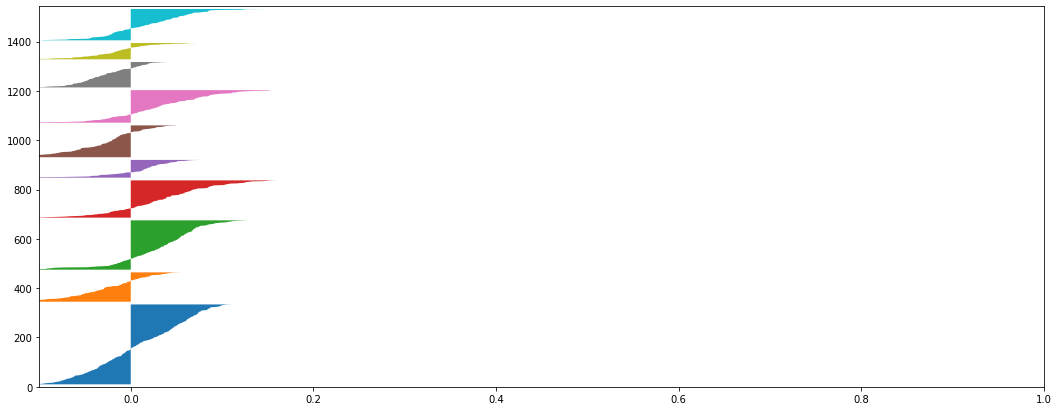

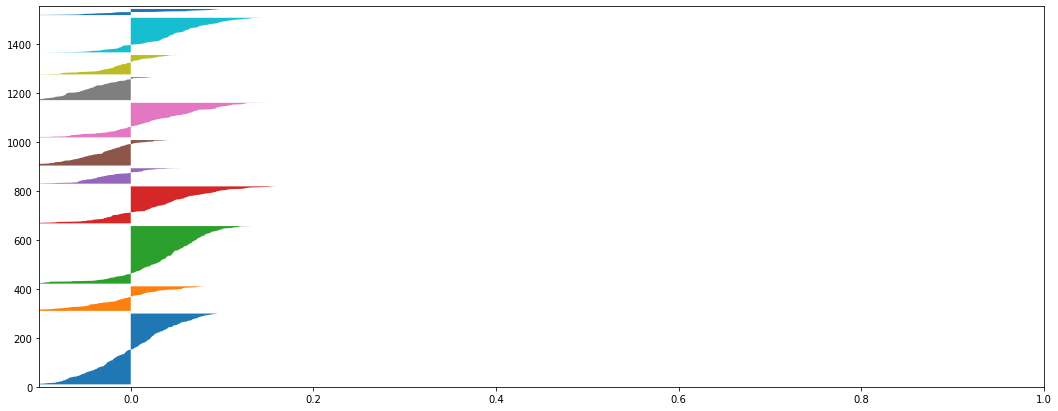

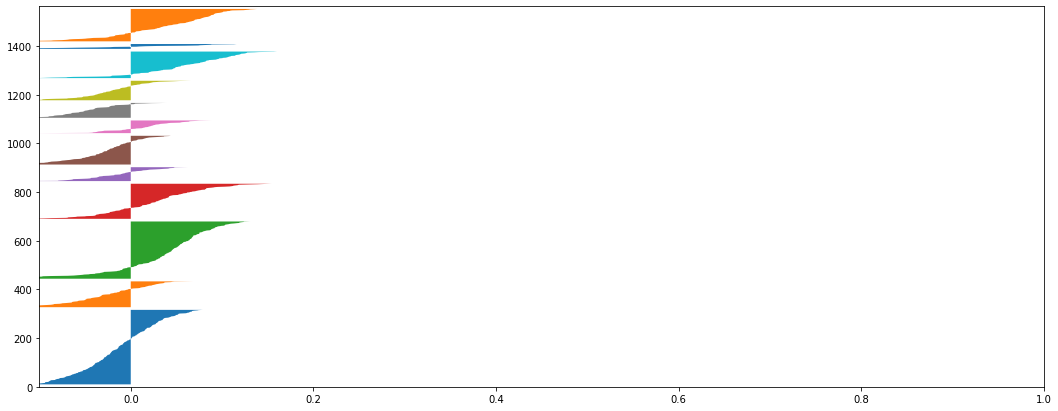

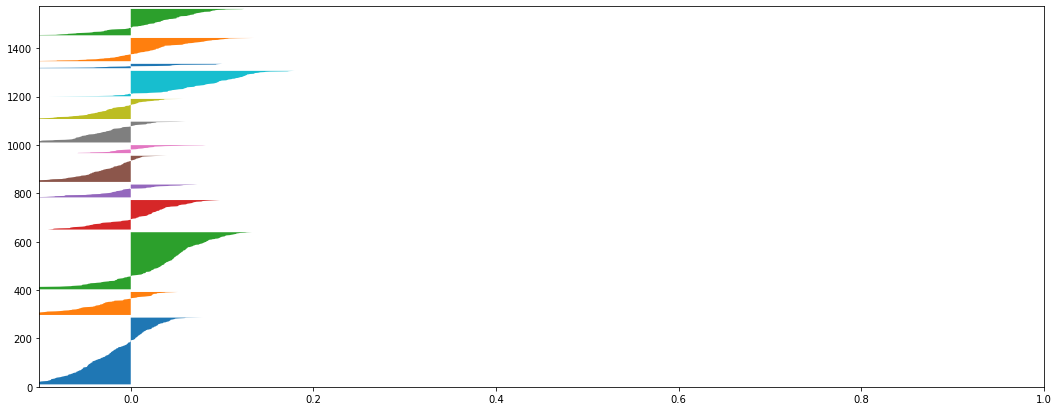

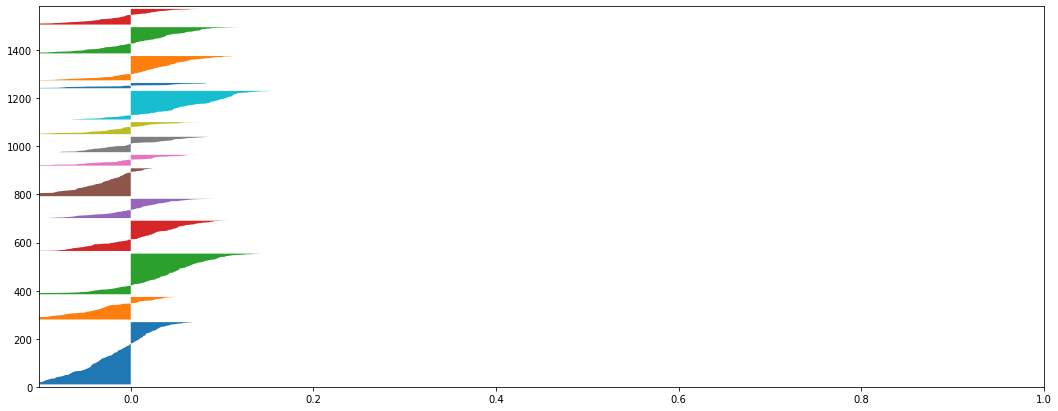

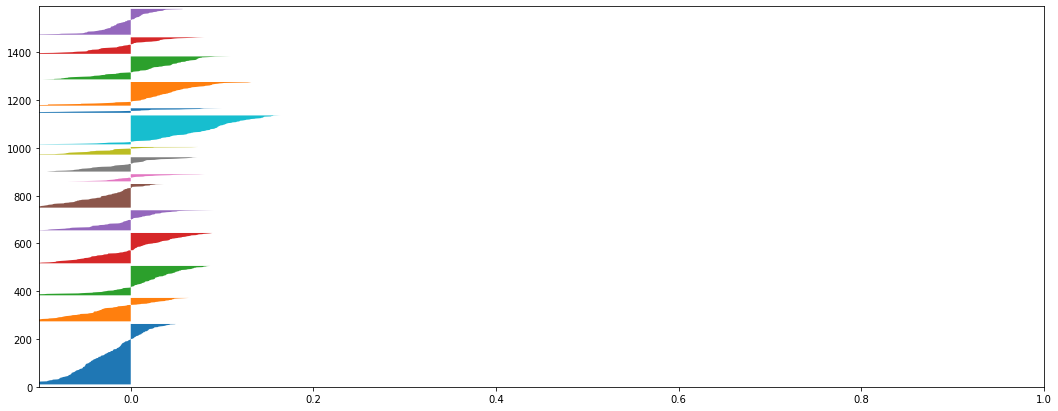

In [14]:
clusters = 15
for cluster in range(2, clusters+1):
    km2 = KModes(n_clusters = cluster,init = 'Cao', random_state = 3, n_jobs= -1)
    y = km2.fit_predict(data1)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data1) + (cluster + 1) * 10])
    
    score = silhouette_score(data1, y)
    print('score :',score)

    sil_sample = silhouette_samples(data1, y)
    y_lower = 10
    for i in range(cluster):
        i_sil_sample = sil_sample[y==i]
        i_sil_sample.sort()
        y_upper = y_lower + i_sil_sample.shape[0]
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,i_sil_sample, )
        y_lower = y_upper + 10

score : 0.07510050478198149
score : 0.036342264442298114


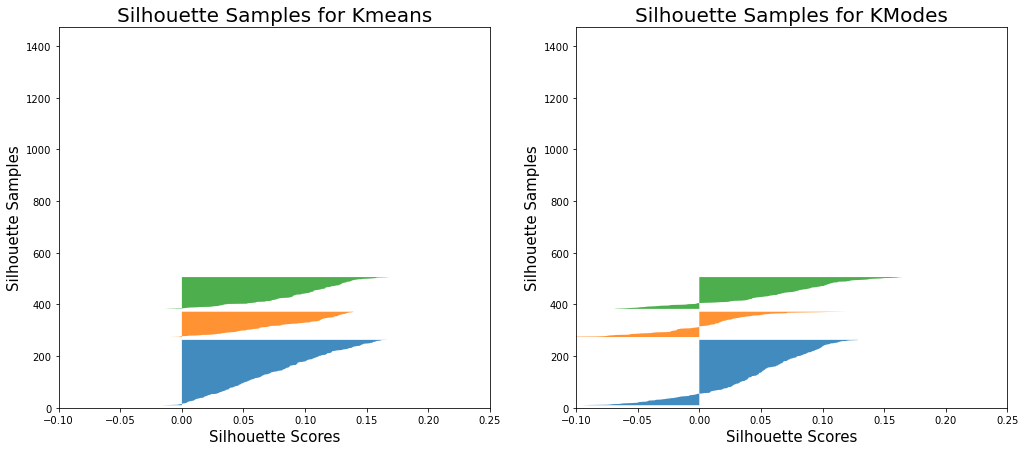

In [13]:
cluster = 3
km1 = KMeans(n_clusters = cluster, random_state = 1)
y1 = km1.fit_predict(data1)
km2 = KModes(n_clusters = cluster,init = 'Cao', random_state = 3)
y2 = km2.fit_predict(data1)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(17, 7)

ax1.set_title('Silhouette Samples for Kmeans', fontsize = 20)
ax1.set_xlabel('Silhouette Scores', fontsize = 15)
ax1.set_ylabel('Silhouette Samples', fontsize = 15)

ax2.set_title('Silhouette Samples for KModes', fontsize = 20)
ax2.set_xlabel('Silhouette Scores', fontsize = 15)
ax2.set_ylabel('Silhouette Samples', fontsize = 15)

ax1.set_xlim([-0.1, 0.25])
ax1.set_ylim([0, len(data1) + (cluster + 1) * 10])
ax2.set_xlim([-0.1, 0.25])
ax2.set_ylim([0, len(data1) + (cluster + 1) * 10])

score1 = silhouette_score(data1, y1)
print('score :',score1)
score2 = silhouette_score(data1, y2)
print('score :',score2)

sil_sample = silhouette_samples(data1, y1)
y_lower = 10
for i in range(cluster):
    i_sil_sample = sil_sample[y==i]
    i_sil_sample.sort()
    y_upper = y_lower + i_sil_sample.shape[0]
    ax1.fill_betweenx(np.arange(y_lower,y_upper),0,i_sil_sample, alpha = 0.85)
    y_lower = y_upper + 10

sil_sample = silhouette_samples(data1, y2)
y_lower = 10
for i in range(cluster):
    i_sil_sample = sil_sample[y==i]
    i_sil_sample.sort()
    y_upper = y_lower + i_sil_sample.shape[0]
    ax2.fill_betweenx(np.arange(y_lower,y_upper),0,i_sil_sample, alpha = 0.85)
    y_lower = y_upper + 10

fig.savefig('g12.jpg',bbox_inches = 'tight', facecolor='white')    

<h3><font color='orange'>So The Kmeans of cluster number 3 is The WINNER</font></h3>

<h4>obj creation</h4>

In [72]:
kmean = KMeans(n_clusters = 3)

In [73]:
kmean.fit(data1)

KMeans(n_clusters=3)

<h4>Predicting clusters</h4>

In [74]:
Y = kmean.predict(data)

In [75]:
Y.shape

(1433,)

<h4>Joinning to data frame</h4>

In [76]:
data['Y'] = Y

In [77]:
data.shape

(1433, 70)

In [78]:
data['Y'].value_counts()

0    527
1    525
2    381
Name: Y, dtype: int64

<h1><font color='green'>Heading up towards Features</font></h1>

In [79]:
X = data.iloc[:, -2::-1]
Y = data.iloc[:, -1]

<h4><font color='orange'>now we have 70 columns</font></h3>

In [80]:
X.shape, Y.shape 

((1433, 69), (1433,))

<h1><font color='green'> Feature Methods -> Filter Methods -> correlation</font></h1>

<h3><font color='red'>Correlation for 0.7 threshold</font></h3>

<h4>dropping columns bellow 0.7 threshold</h4>

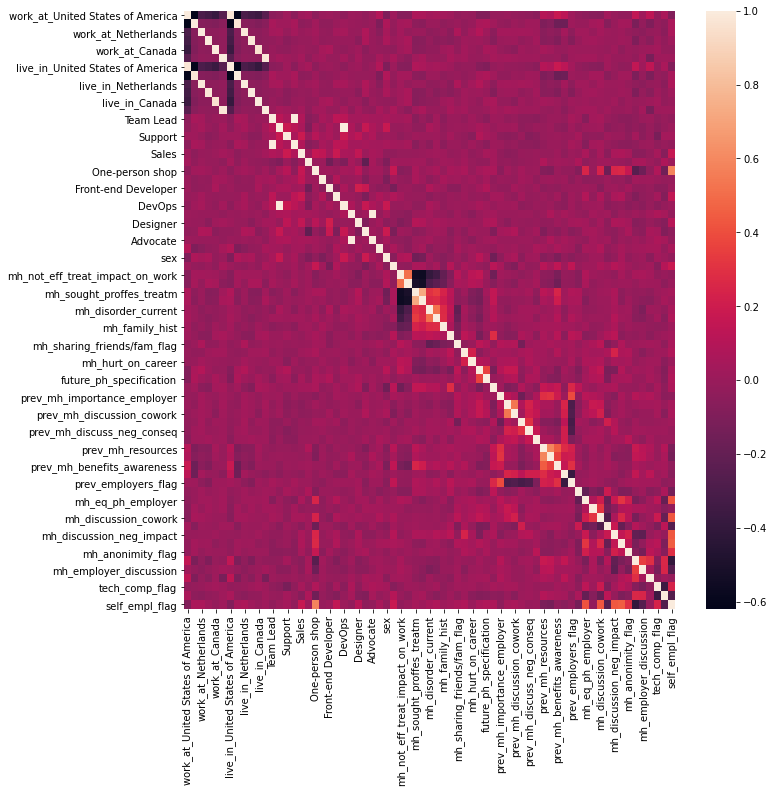

In [81]:
# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = X.corr()

# optional: display a heatmap of the correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix)

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
X.drop(labels=corr_features, axis=1, inplace=True)

<h4>Lets look over heatmap of correlation</h4>

<AxesSubplot:>

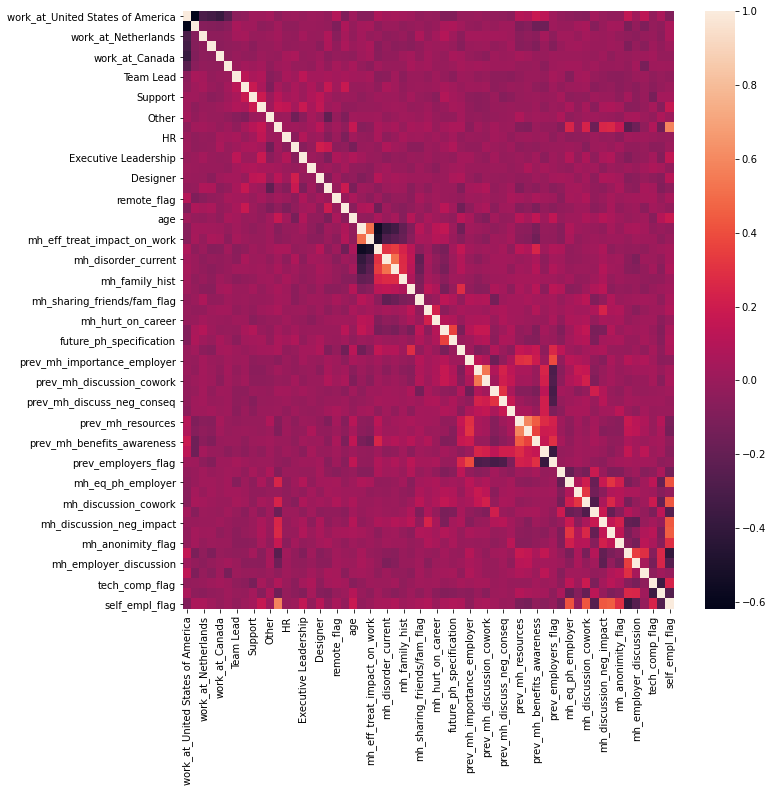

In [82]:
plt.figure(figsize=(11,11))
sns.heatmap(X.corr())

<h4><font color='orange'>now we have 59 columns</font></h3>

In [83]:
X.shape

(1433, 59)

<h1><font color='green'>Feature Slection -> Wrapper Methods -> Backward Elimination</font></h1>

<h3><font color='red'>Sequential Forward Selection for K feature = 50</font></h3>

In [84]:
SFS = SequentialFeatureSelector(RandomForestClassifier(n_jobs = -1), 
           k_features=50, 
           forward=False, 
           floating=False,
           scoring='accuracy',
           cv=2,
           n_jobs = -1) 

In [85]:
SFS.fit(X, Y)

SequentialFeatureSelector(cv=2, estimator=RandomForestClassifier(n_jobs=-1),
                          forward=False, k_features=50, n_jobs=-1,
                          scoring='accuracy')

In [86]:
print('->Best accuracy score: %.2f' % SFS.k_score_)
print('->Best subset (indices):', SFS.k_feature_idx_)
print('->Best subset (corresponding names):', SFS.k_feature_names_)

->Best accuracy score: 0.92
->Best subset (indices): (0, 1, 2, 5, 6, 7, 8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58)
->Best subset (corresponding names): ('work_at_United States of America', 'work_at_United Kingdom', 'work_at_Netherlands', 'work_at_Australia', 'Team Lead', 'SysAdmin', 'Support', 'One-person shop', 'Front-end Developer', 'Executive Leadership', 'Dev Evangelist', 'Designer', 'Back-end Developer', 'remote_flag', 'sex', 'age', 'mh_not_eff_treat_impact_on_work', 'mh_eff_treat_impact_on_work', 'mh_sought_proffes_treatm', 'mh_disorder_past', 'mh_family_hist', 'mh_bad_response_workplace', 'mh_sharing_friends/fam_flag', 'mh_hurt_on_career', 'prev_mh_conseq_coworkers', 'prev_mh_importance_employer', 'prev_mh_discussion_supervisor', 'prev_mh_discussion_cowork', 'prev_ph_discuss_neg_conseq', 'prev_mh_discuss_neg_conseq', 'prev_mh_anonimity', 'prev_mh_re

<h4>Lets see standard deviation for SFS</h4>

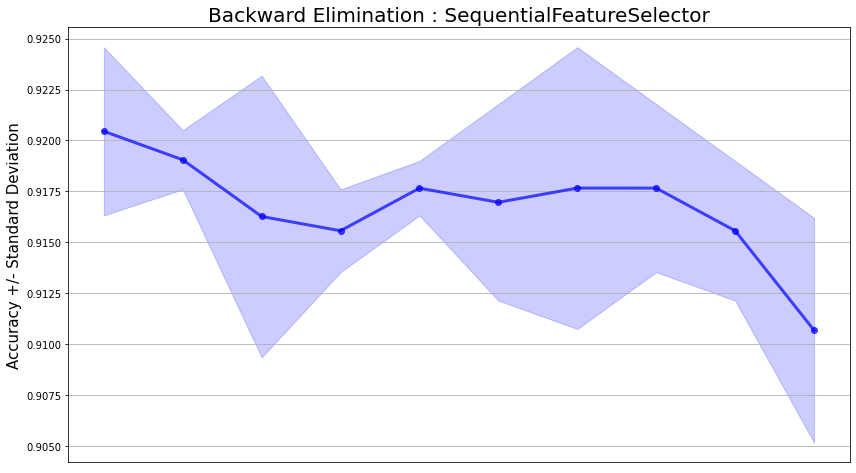

In [97]:
metric_dict = SFS.get_metric_dict()

fig = plt.figure(figsize = (14, 8))
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='b',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o',alpha=0.7, linewidth = 3)
plt.ylabel('Accuracy +/- Standard Deviation', fontsize=15)
#plt.xlabel('Number of Features', fontsize=20)
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
# plt.xticks(k_feat, 
#            [str(metric_dict[k]['feature_names']) for k in k_feat], 
#            rotation=90)
plt.xticks([])
plt.grid(axis='y')
plt.title('Backward Elimination : SequentialFeatureSelector', fontsize=20)
plt.show()
fig.savefig('g13.jpg',bbox_inches = 'tight', facecolor='white')

<h4>Transforming it</h4>

In [98]:
X = SFS.transform(X)

<h4><font color='orange'>now we have 50 columns</font></h3>

In [99]:
X.shape

(1433, 50)

<h4>Lets look Correlation</h4>

<AxesSubplot:>

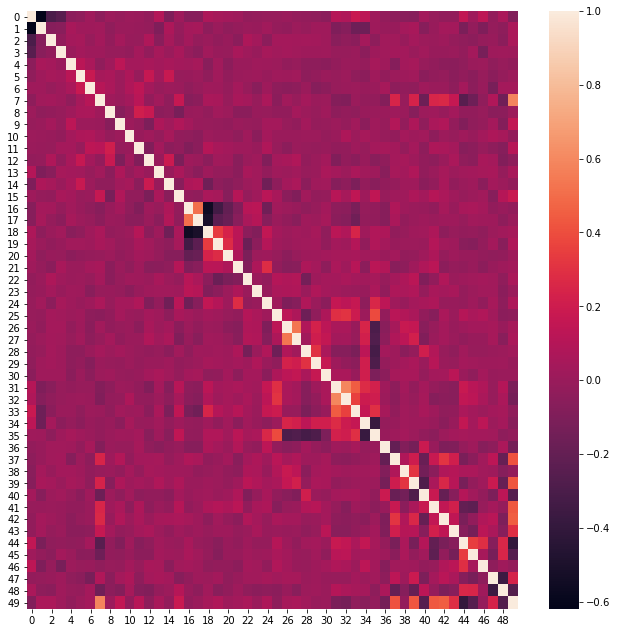

In [100]:
plt.figure(figsize=(11,11))
sns.heatmap(pd.DataFrame(X).corr())

<h1><font color='green'>Feature Extraction -> Principal components analysis</font></h1> 

<h3><font color='red'>PCA</font></h3>

<h4>Lets find what should be the n_components/Feature</h4>

In [101]:
temp_pca = PCA()
temp_pca.fit(X)
var = np.cumsum(temp_pca.explained_variance_ratio_)

<h4>Now we got 27 is good option as 95% of variance is seccured</h4>  

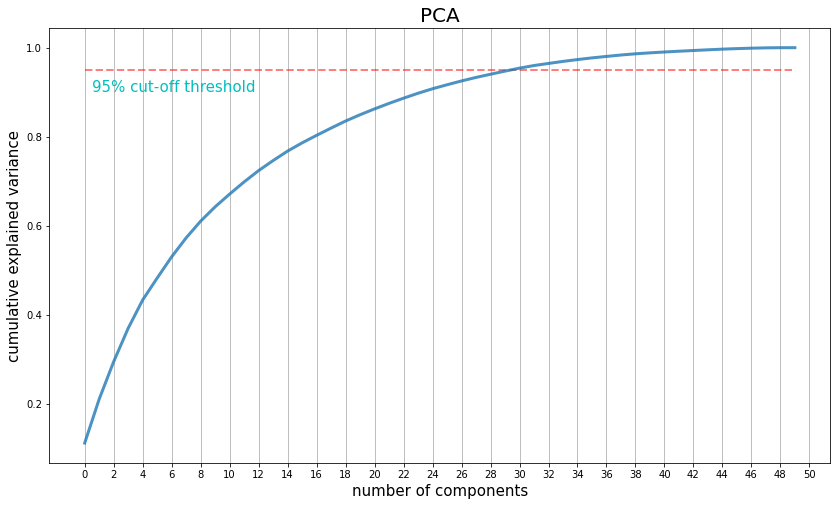

In [114]:
fig = plt.figure(figsize = (14, 8))
plt.plot([0.95]*len(var), '--', color = 'r', alpha = 0.5,linewidth = 2)
plt.plot(var,alpha = 0.8,linewidth = 3)
plt.grid(axis='x')
plt.xticks(range(0,len(var) + 2,2))
plt.title('PCA',fontsize=20)
plt.text(0.5, 0.90, '95% cut-off threshold', color = 'c', fontsize=15)
plt.xlabel('number of components', fontsize=15)
plt.ylabel('cumulative explained variance',fontsize=15)
fig.savefig('g14.jpg',bbox_inches = 'tight', facecolor='white')

<h4>Now creating obj for n_components = 27</h4>

In [115]:
pca = PCA(n_components = 27, random_state = 87)

In [116]:
pca.fit(X)

PCA(n_components=27, random_state=87)

<h4>Now Transformingg </h4>

In [117]:
X = pca.transform(X)

<h4><font color='orange'>Finally we left with 27 Features (70 -> 27)</font></h3>

In [118]:
X.shape

(1433, 27)

In [119]:
data = pd.DataFrame(X)

<h4>Joinig it</h4>

In [120]:
data['Y'] = Y

<h4>Our New Data Frame</h4> 

In [121]:
data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,Y
0,-2.383632,-1.568942,0.285329,-1.200309,-1.545633,-0.591625,0.695267,-2.026514,-0.895351,0.000795,...,0.020459,-0.178588,-0.136677,-0.220281,0.648599,-0.097365,0.090247,-0.719260,0.599072,0
1,1.500232,0.048969,2.285218,-2.091601,-1.607394,-1.455202,0.506022,1.831865,-0.805522,0.716496,...,0.555803,-0.094203,0.990158,0.972047,-0.243724,-0.840110,0.651961,0.110250,0.677344,1
2,-1.466972,-1.093627,0.255069,-0.162551,3.329903,-0.172629,2.055627,-0.470930,-0.542791,0.663626,...,0.171765,-0.115421,0.561675,-0.663195,0.230692,-0.334066,-1.161109,-0.219652,1.121185,0
3,-0.482365,-1.358218,-2.038225,0.108384,2.578950,-0.201188,0.224732,-1.601397,0.034895,0.005087,...,0.492627,0.626017,0.044705,0.474081,-0.357033,0.035260,-0.037069,0.047404,0.463156,1
4,0.012895,-0.594591,1.058413,0.741852,2.678643,0.487863,-0.517540,-0.575907,-1.668227,0.368158,...,-2.096471,0.749235,0.933640,1.073854,-0.407960,0.342522,0.988575,-0.840211,0.064177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,-1.295735,-3.440120,2.110109,-1.610552,0.825810,-1.623374,-0.343765,-1.116716,0.170348,-0.235987,...,-0.872067,-0.438869,-0.811626,-0.374068,-0.001373,-0.056816,0.585296,0.359865,-0.715481,0
1429,0.018082,-0.312253,-3.474444,0.544072,1.102866,-1.249211,-1.135329,-0.852247,1.341531,-1.125451,...,-0.787792,0.016030,-1.148486,0.021568,-0.547854,-1.379885,0.426313,0.728607,-1.041582,1
1430,2.675925,-0.832565,-0.082734,2.540787,-0.110995,1.958493,-0.039652,-1.639048,0.938887,0.586137,...,1.229785,-0.226014,0.852048,-1.029131,0.227832,-0.985071,0.548177,-0.445678,0.598578,1
1431,-0.302655,3.663742,1.393329,-0.561836,-2.245529,1.027710,-0.327478,-1.526622,0.382572,-1.588983,...,-0.144645,0.633372,0.350201,0.061185,-2.118822,-0.218502,0.064072,-0.081497,0.229247,2


<h1><font color='green'>train test split</font></h1> 

In [122]:
X = data.iloc[:,0:27]
Y = data.iloc[:,27]

<h3><font color='red'>slpitting for 20% of test and 80% of Training data</font></h3>

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 18, test_size = 0.2)

<h4>Lets check for shape</h4>

In [124]:
X_train.shape, Y_train.shape

((1146, 27), (1146,))

In [125]:
X_test.shape, Y_test.shape

((287, 27), (287,))

In [126]:
y = Y_train

In [127]:
pca = PCA(n_components = 1, random_state = 97)
x = pca.fit_transform(X_train).reshape(1,-1)[0]

In [128]:
x.shape,y.shape

((1146,), (1146,))

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Y'>

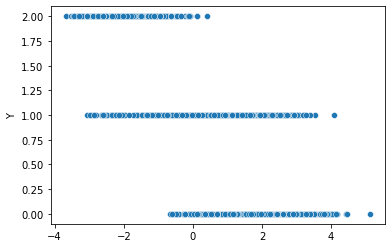

In [39]:
sns.scatterplot(x,y)
# sns.scatterplot(x[:,0],x[:,1],hue=y)

In [40]:
LR = LinearRegression()
LR.fit(x.reshape(-1,1),y)

LinearRegression()

In [41]:
LR.score(x.reshape(-1,1),y)

0.6508275383724863

In [42]:
m = LR.coef_[0]
c = LR.intercept_

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Y'>

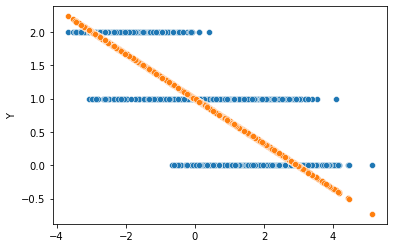

In [43]:
sns.scatterplot(x,y)
sns.scatterplot(x,((m*x) + c))

<h1><font color='green'>Supervised on Data -> Classification -> Random Forest</font></h1>

<h3><font color='red'>Tunning of Hyper Parameter for RF</font></h3>

In [129]:
criterions = ["gini", "entropy"]
scores = {"gini" : [], "entropy" : []}
for criterion in criterions:
    score_train = []
    score_test = []
    for depth in range(1,15):
        RF_temp = RandomForestClassifier(criterion = criterion, random_state = 13, max_depth = depth, n_jobs = -1)
        RF_temp.fit(X_train, Y_train)
        score_train.append(RF_temp.score(X_train, Y_train))
        score_test.append(RF_temp.score(X_test,Y_test))
    scores[criterion].append([score_train,score_test])

<h4><font color='orange'>Graph for Entropy where we are checking accuray of train, test and Overfitting </font></h3>

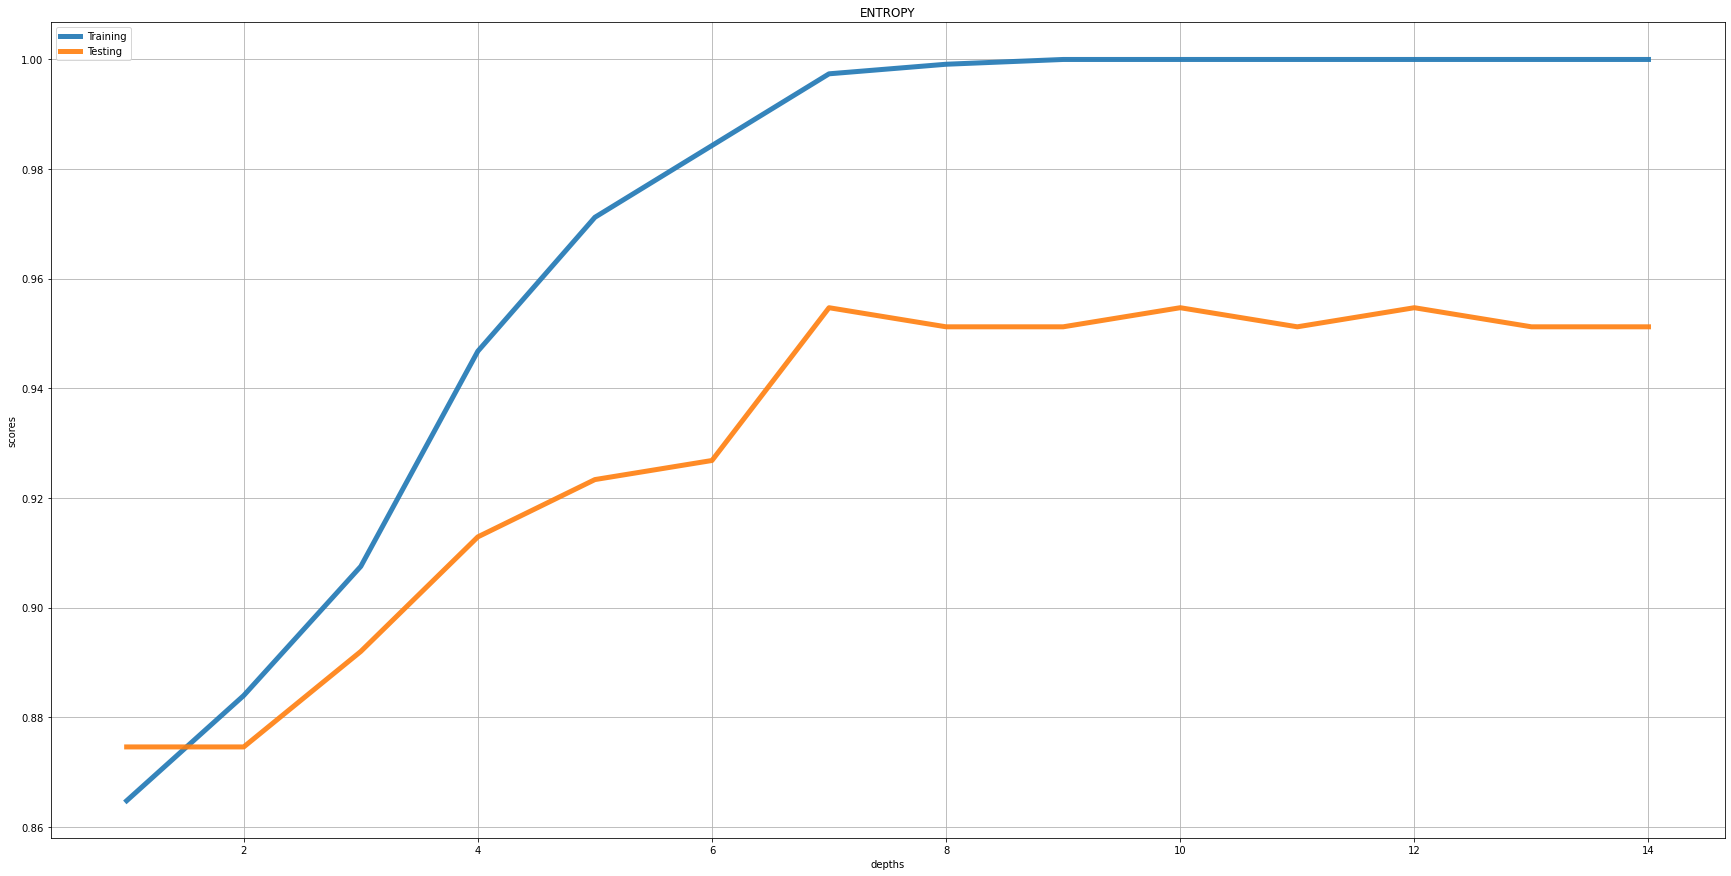

In [45]:
plt.figure(figsize=(30,15))
plt.xlabel("depths")
plt.ylabel("scores")
plt.title("ENTROPY")
plt.plot(range(1,15), scores['entropy'][0][0],alpha = 0.9,label = "Training", linewidth = 5)
plt.plot(range(1,15), scores['entropy'][0][1],alpha = 0.9,label = "Testing", linewidth = 5)
plt.grid()
plt.legend()
plt.show()

<h4><font color='orange'>Graph for Gini where we are checking accuray of train, test and Overfitting </font></h3>

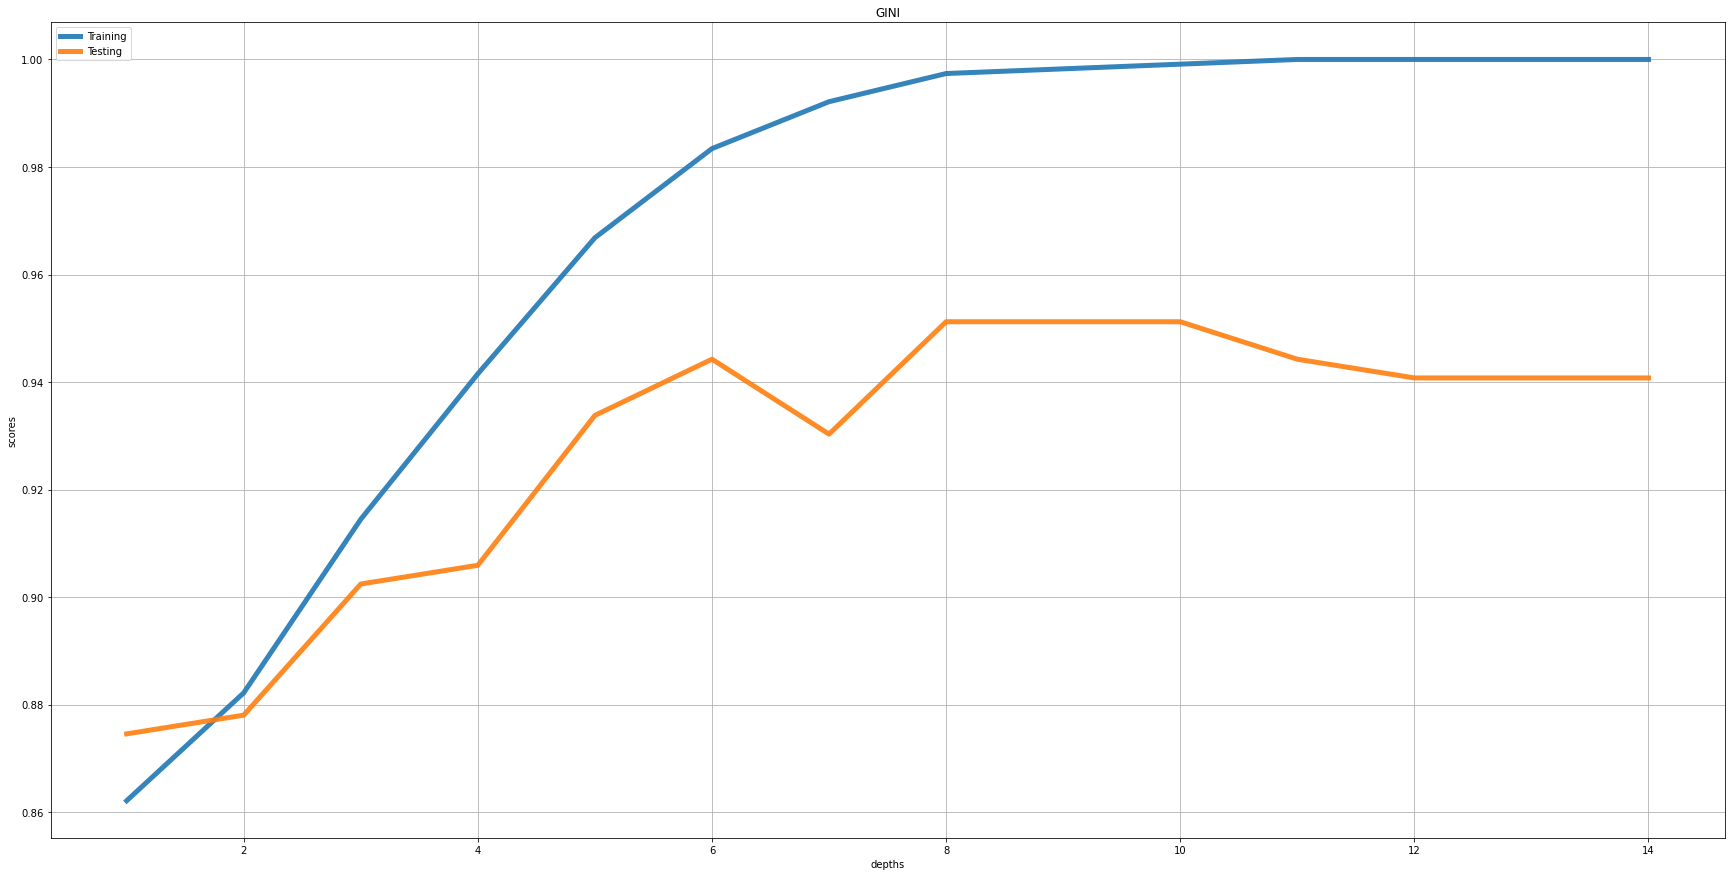

In [46]:
plt.figure(figsize=(30,15))
plt.xlabel("depths")
plt.ylabel("scores")
plt.title("GINI")
plt.plot(range(1,15), scores['gini'][0][0],alpha = 0.9,label = "Training", linewidth = 5)
plt.plot(range(1,15), scores['gini'][0][1],alpha = 0.9,label = "Testing", linewidth = 5)
plt.grid()
plt.legend()
plt.show()

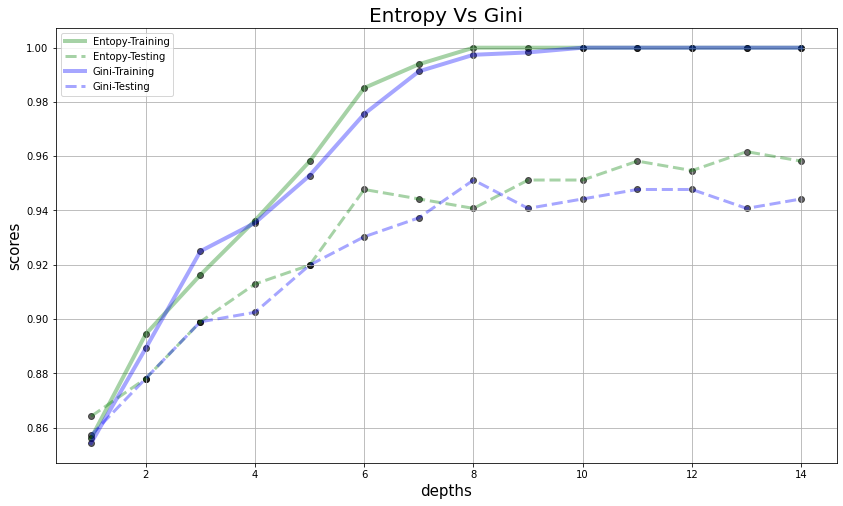

In [147]:
fig = plt.figure(figsize = (14, 8))
plt.xlabel("depths",fontsize = 15)
plt.ylabel("scores",fontsize = 15)
plt.title("Entropy Vs Gini",fontsize = 20)

plt.plot(range(1,15), scores['entropy'][0][0], alpha = 0.35, linewidth = 4, c = 'g', label = 'Entopy-Training')
plt.scatter(range(1,15), scores['entropy'][0][0],alpha = 0.6, c = 'k')
plt.plot(range(1,15), scores['entropy'][0][1], '--',alpha = 0.35, linewidth = 3, c = 'g', label = 'Entopy-Testing')
plt.scatter(range(1,15), scores['entropy'][0][1],alpha = 0.6, c = 'k')

plt.plot(range(1,15), scores['gini'][0][0], alpha = 0.35, linewidth = 4, c = 'b', label = 'Gini-Training')
plt.scatter(range(1,15), scores['gini'][0][0],alpha = 0.6, c = 'k')
plt.plot(range(1,15), scores['gini'][0][1], '--',alpha = 0.35, linewidth = 3, c = 'b', label = 'Gini-Testing')
plt.scatter(range(1,15), scores['gini'][0][1],alpha = 0.6, c = 'k')
plt.grid()
plt.legend()
fig.savefig('g15.jpg',bbox_inches = 'tight', facecolor='white')

<h4>Analysing above Graphs</h4>

<h3><font color='red'>Now The RF for criterion = 'entropy', max_depth = 10 is Winner</font></h3>

<h4>Creating Obj</h4>

In [47]:
RF = RandomForestClassifier(criterion = 'entropy', random_state = 19, max_depth = 10, n_jobs = -1)

In [48]:
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1,
                       random_state=19)

In [49]:
Y_pred1 = RF.predict(X_test)

<h4>checking for train and test score</h4>

In [50]:
print("Training Score :",RF.score(X_train, Y_train))
print("Testing Score :",RF.score(X_test, Y_test))

Training Score : 1.0
Testing Score : 0.9547038327526133


<h4>Lets look on f1-score, precision, recall </h4> 

In [51]:
print("Classification report :\n",classification_report(Y_test,Y_pred1))

Classification report :
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       105
           1       0.94      0.90      0.92        71
           2       0.99      0.97      0.98       111

    accuracy                           0.95       287
   macro avg       0.95      0.95      0.95       287
weighted avg       0.96      0.95      0.95       287



<h4><font color='orange'>Lets plot the Giant tree </font></h3>

[Text(3257.8774752475247, 4151.127272727273, '0 <= -0.567\nentropy = 1.563\nsamples = 724\nvalue = [443, 291, 412]'),
 Text(1797.2710396039602, 3755.7818181818184, '18 <= 0.342\nentropy = 0.644\nsamples = 297\nvalue = [3, 67, 401]'),
 Text(942.6608910891089, 3360.4363636363637, '21 <= 0.262\nentropy = 0.433\nsamples = 189\nvalue = [0, 27, 277]'),
 Text(310.76732673267327, 2965.090909090909, '26 <= -0.33\nentropy = 0.284\nsamples = 136\nvalue = [0, 11, 211]'),
 Text(227.8960396039604, 2569.745454545455, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 65]'),
 Text(393.6386138613861, 2569.745454545455, '19 <= -1.651\nentropy = 0.366\nsamples = 96\nvalue = [0, 11, 146]'),
 Text(165.74257425742573, 2174.4, '18 <= -0.734\nentropy = 0.811\nsamples = 3\nvalue = [0, 3, 1]'),
 Text(82.87128712871286, 1779.0545454545454, 'entropy = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(248.61386138613858, 1779.0545454545454, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(621.5346534653465, 2174.4, '2

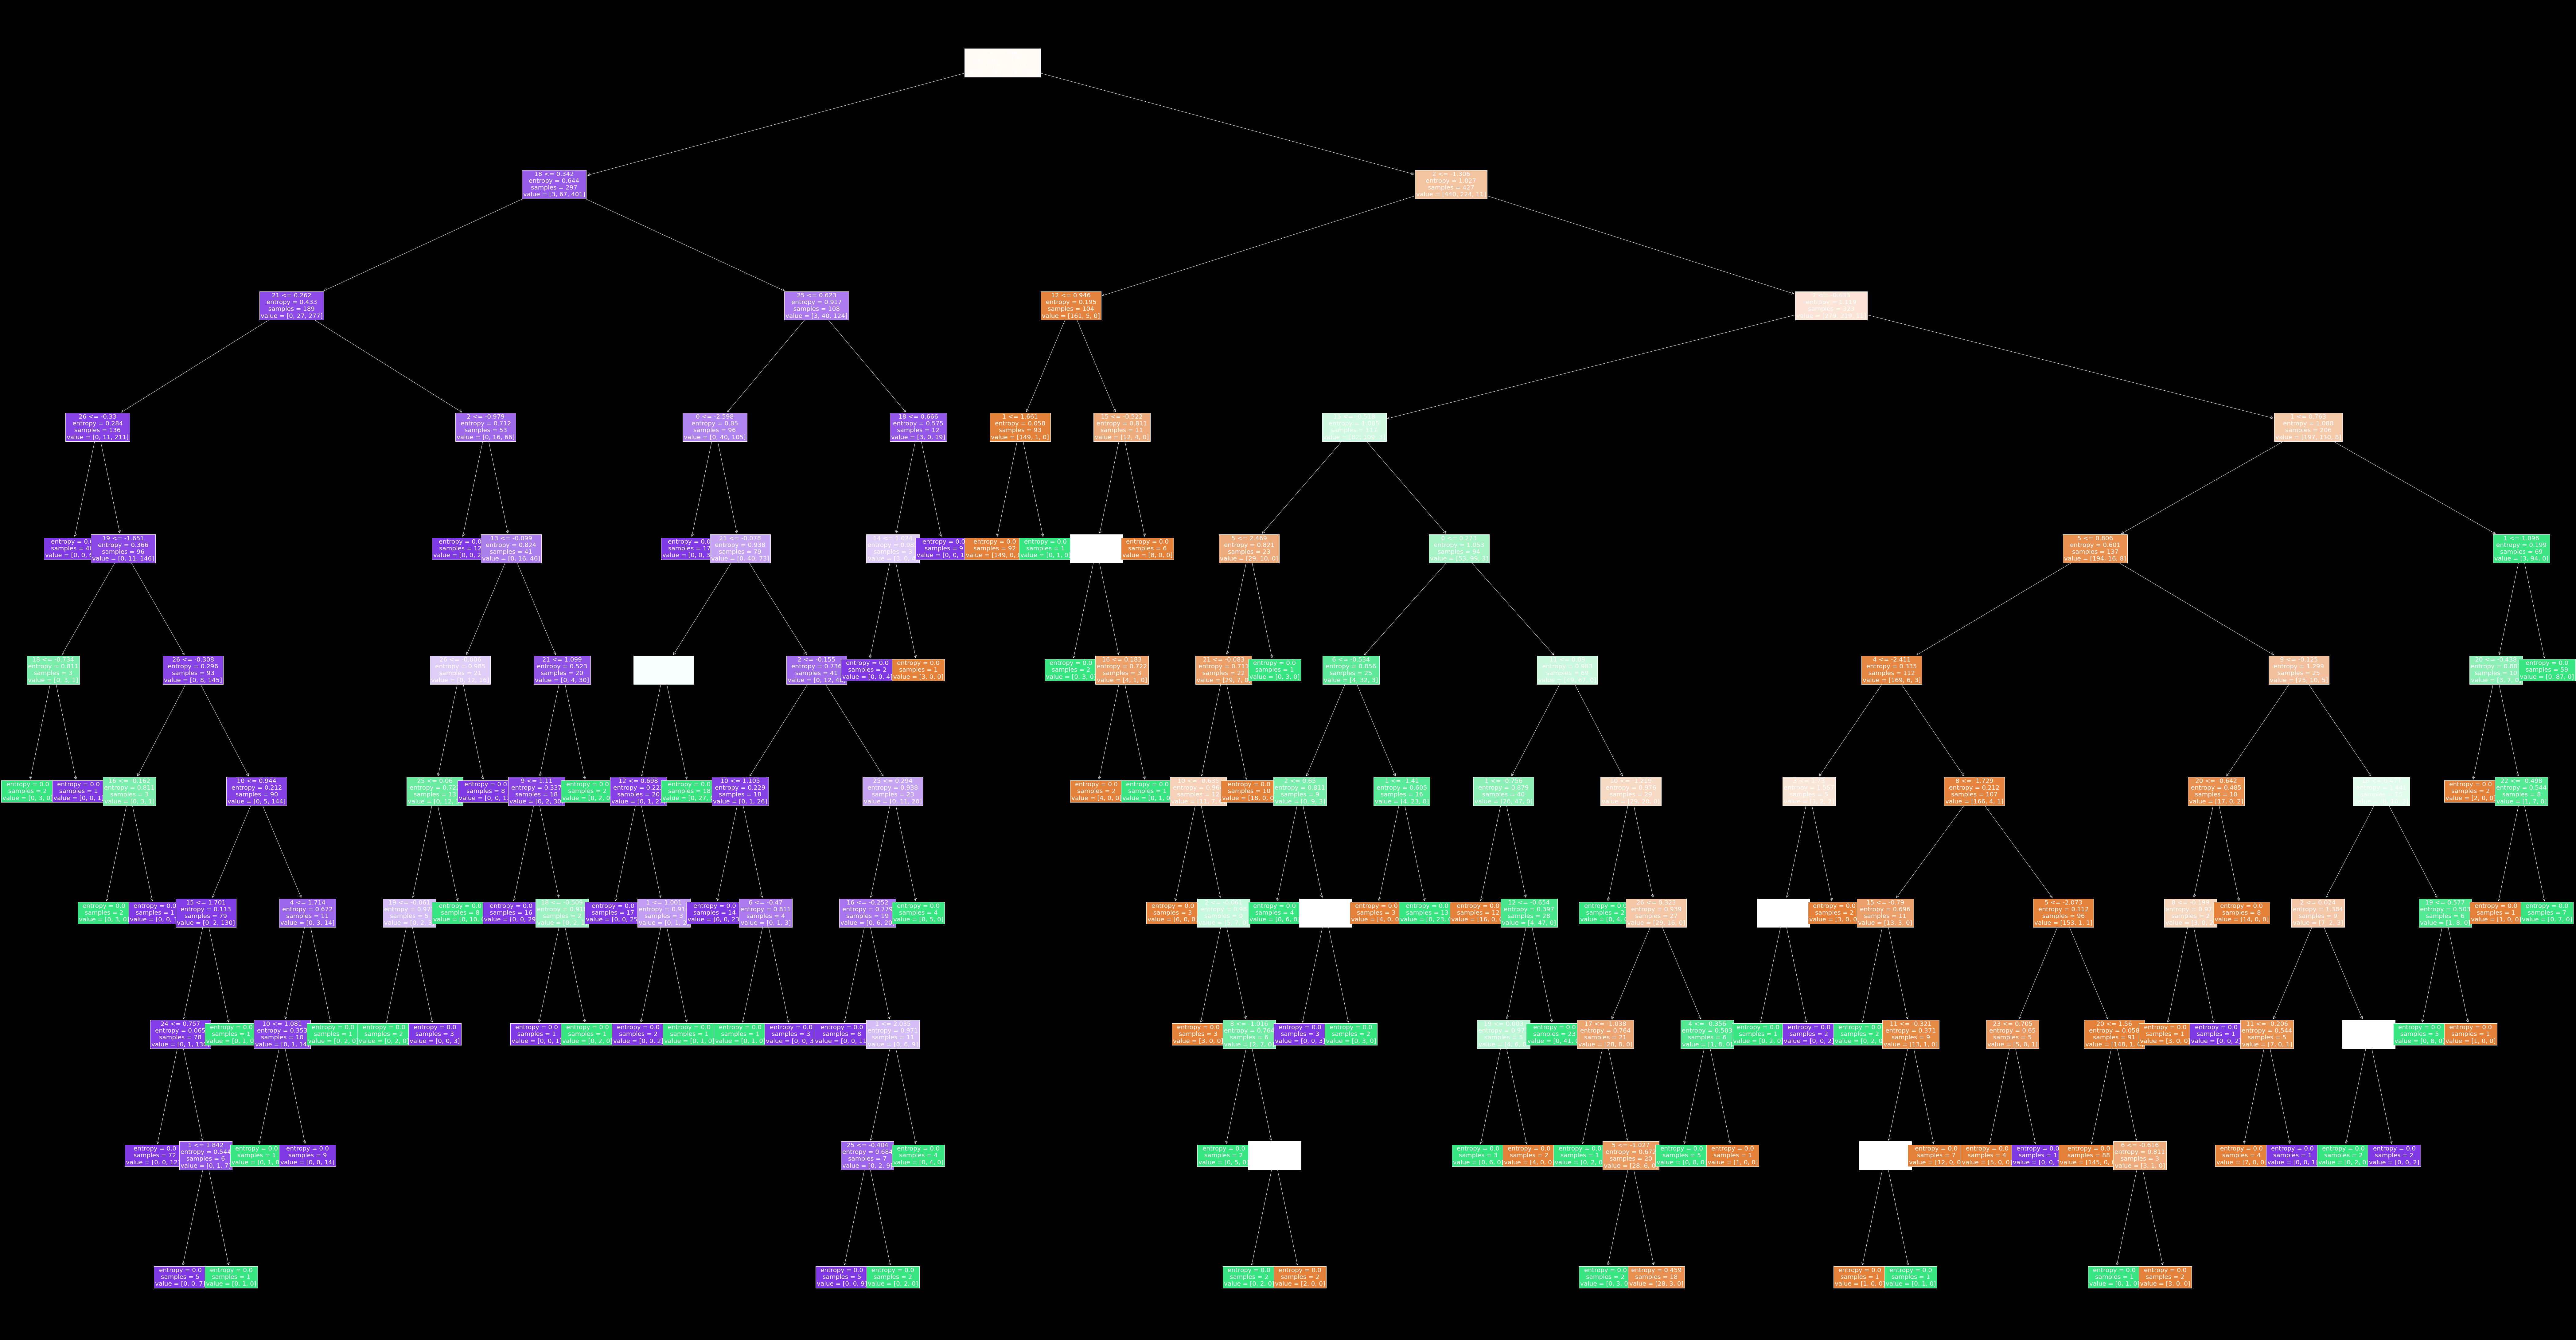

In [52]:
plt.style.use('dark_background')
plt.subplots(figsize=(150,80))
plot_tree(RF.estimators_[0], feature_names=X_train.columns, filled=True, fontsize = 20)

In [53]:
X_train.shape

(1146, 27)

<h1><font color='green'>Supervised on Data -> Classification -> KNN</font></h1>

In [54]:
# s=[]
# for i in range(1,int(X_train.shape[0]**0.5)+50,2):
#     knn_temp = KNeighborsClassifier(n_neighbors=i, n_jobs = -1)
#     knn_temp.fit(X_train,Y_train)
#     Y_pred = knn_temp(X_test)
# #     temp = knn_temp.score(Y_test,Y_pred)
# #     s.append(temp)
# s

<h1><font color='green'>Supervised on Data -> Classification -> SVM</font></h1>

In [55]:
scores = {"linear" : [], "rbf" : [], "poly" : []}
kernels = ["linear", "rbf", "poly"]
gammas = [0.1, 1, 10, 100]
for kernel in kernels:
    score_train = []
    score_test = []
    for gamma in gammas:
        SVM_temp = SVC(kernel = kernel, gamma = gamma, random_state = 11)
        SVM_temp.fit(X_train, Y_train)
        score_train.append(SVM_temp.score(X_train, Y_train))
        score_test.append(SVM_temp.score(X_test,Y_test))
    scores[kernel].append([score_train,score_test])

In [56]:
plt.style.use('seaborn-darkgrid')

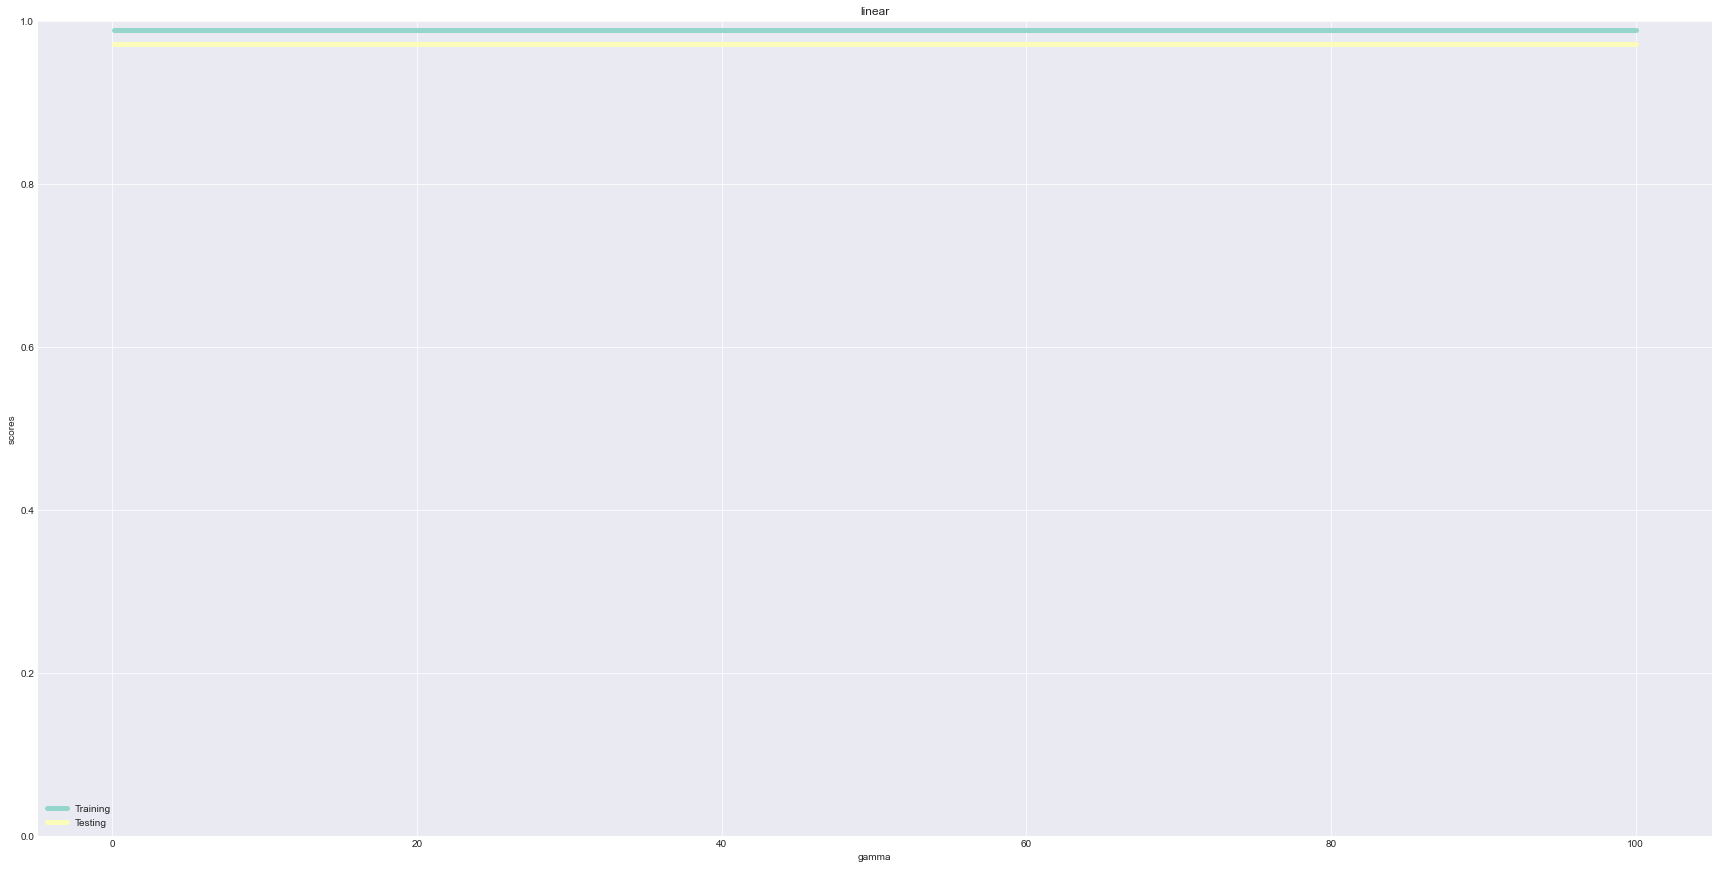

In [57]:
# gammas = [0.1, 1, 10, 100]
plt.figure(figsize=(30,15))
plt.xlabel("gamma")
plt.ylabel("scores")
plt.title("linear")
plt.ylim([0,1])
plt.plot(gammas, scores['linear'][0][0],alpha = 0.9, label = "Training", linewidth = 5)
plt.plot(gammas, scores['linear'][0][1],alpha = 0.9, label = "Testing", linewidth = 5)
plt.legend()
plt.show()

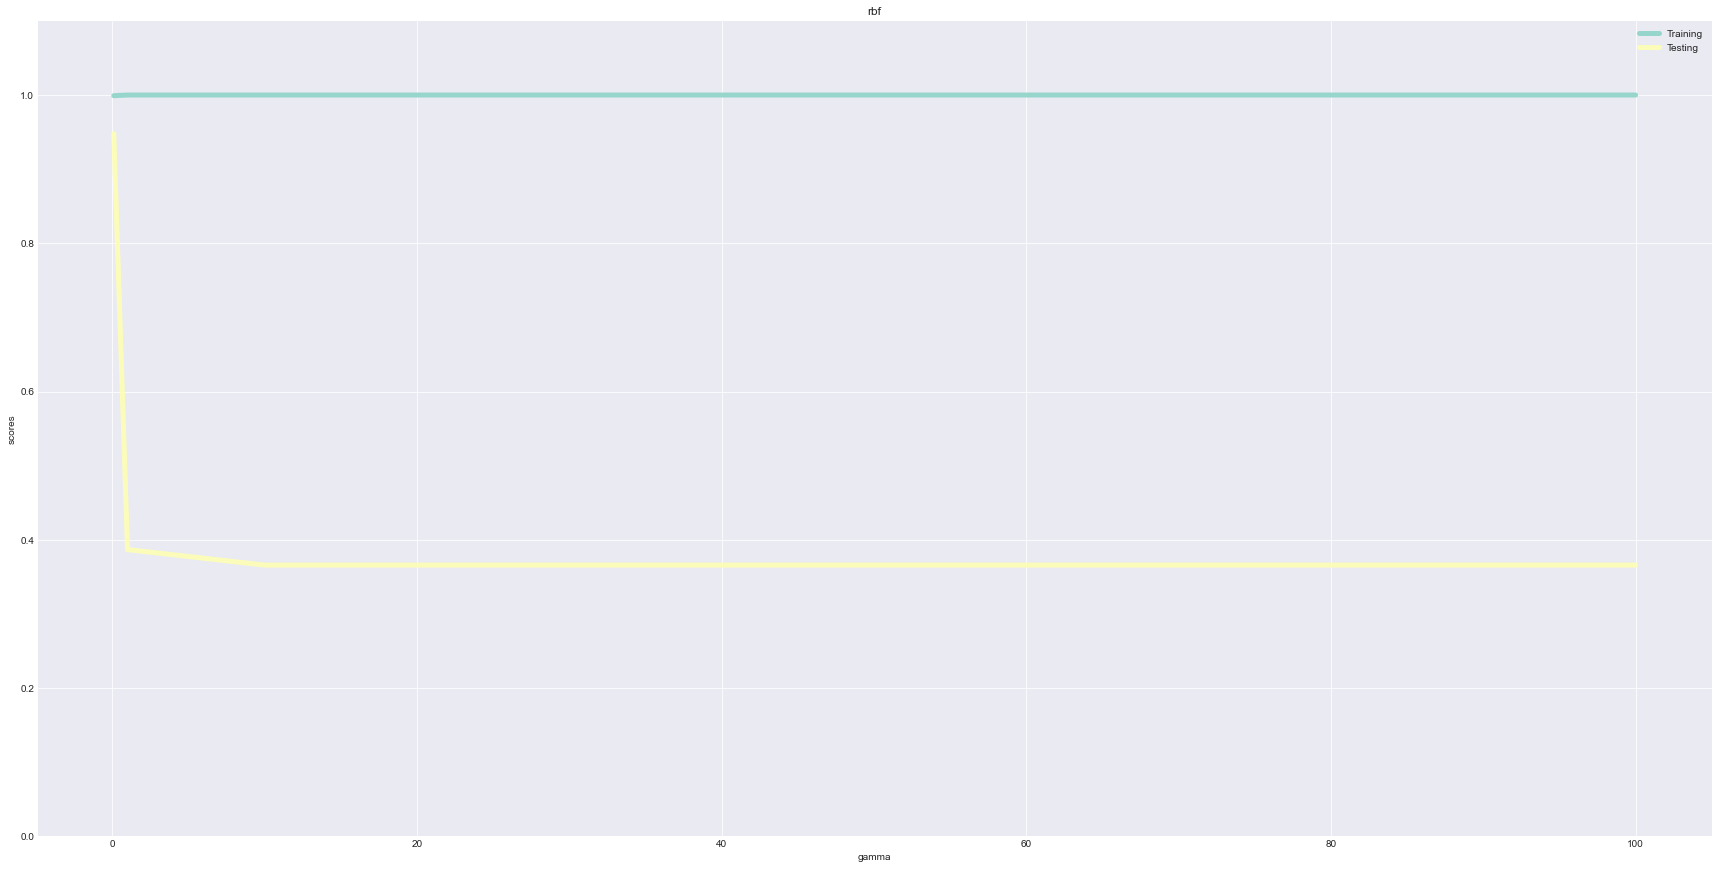

In [58]:
plt.figure(figsize=(30,15))
plt.xlabel("gamma")
plt.ylabel("scores")
plt.title("rbf")
plt.ylim([0,1.1])
plt.plot(gammas, scores['rbf'][0][0],alpha = 0.9, label = "Training", linewidth = 5)
plt.plot(gammas, scores['rbf'][0][1],alpha = 0.9, label = "Testing", linewidth = 5)
plt.legend()
plt.show()

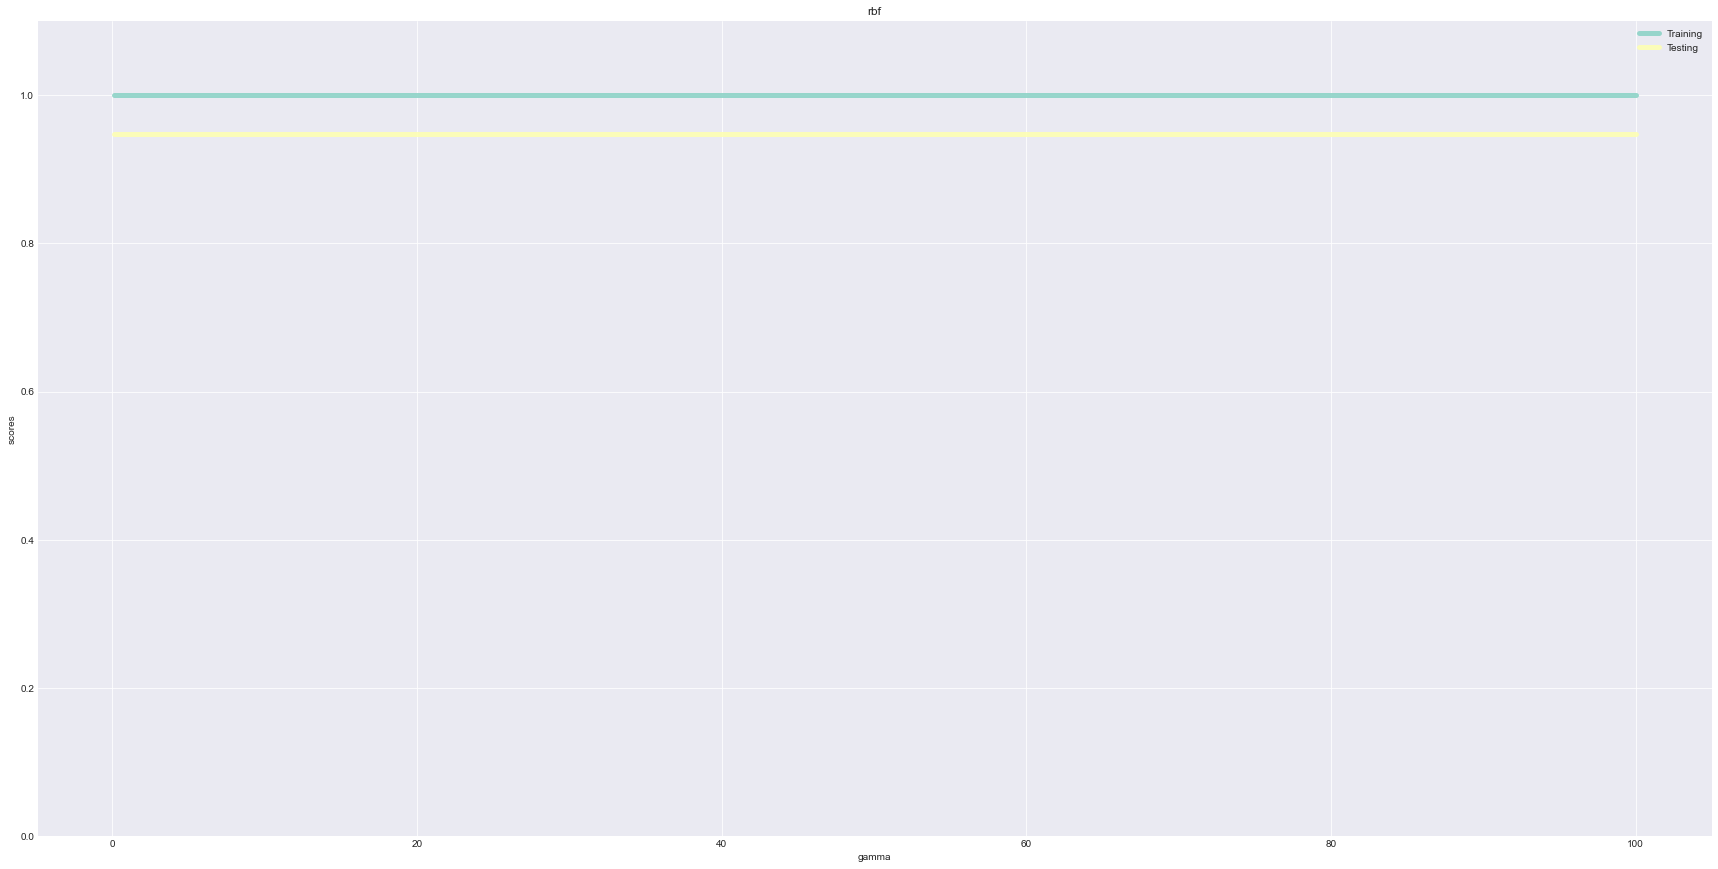

In [59]:
plt.figure(figsize=(30,15))
plt.xlabel("gamma")
plt.ylabel("scores")
plt.title("rbf")
plt.ylim([0,1.1])
plt.plot(gammas, scores['poly'][0][0],alpha = 0.9, label = "Training", linewidth = 5)
plt.plot(gammas, scores['poly'][0][1],alpha = 0.9, label = "Testing", linewidth = 5)
plt.legend()
plt.show()

In [60]:
SVM = SVC(kernel = 'linear', C = 1)

In [61]:
SVM.fit(X_train, Y_train)

SVC(C=1, kernel='linear')

In [62]:
y_pred3 = SVM.predict(X_test)

In [63]:
print("Training Score :",SVM.score(X_train, Y_train))
print("Testing Score :",SVM.score(X_test, Y_test))

Training Score : 0.9886561954624782
Testing Score : 0.9721254355400697


In [64]:
plt.style.use('dark_background')

In [62]:
results = pd.DataFrame([['LR','LogR','SVM','DT','RF','KNN'],[0.07,0.89,0.84,0.93,0.97,0.87]]).T

In [63]:
results.columns = ['Model','Accuracy']

In [66]:
results = results.sort_values(['Accuracy'], ascending = False)

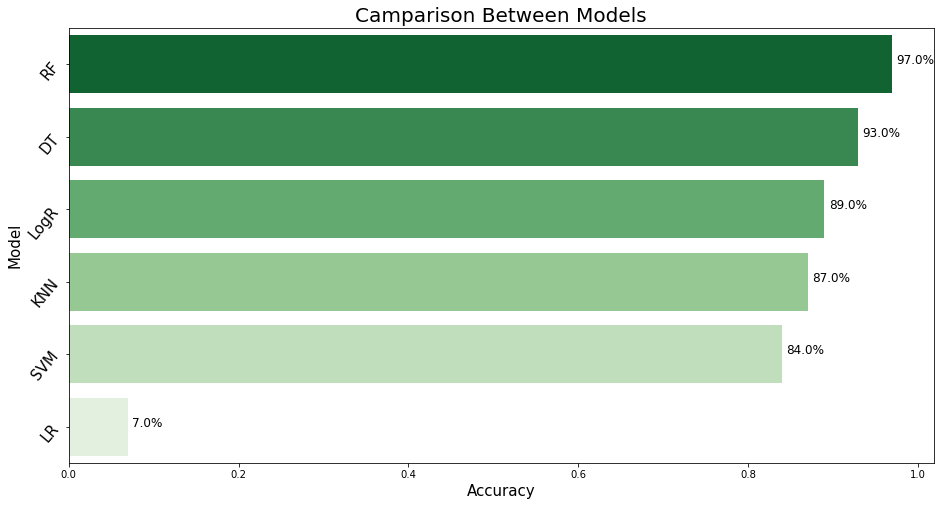

In [90]:
fig = plt.figure(figsize = (15.5, 8))
plt.title('Camparison Between Models',fontsize=20)
plt.xlabel('Accuracy',fontsize = 15)
plt.ylabel('Models',fontsize = 15)
plt.yticks(rotation =50,fontsize =15)
ax = sns.barplot(x = results['Accuracy'], y = results['Model'], orient = 'h',palette='Greens_r') 

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/1)
    x = p.get_x() + p.get_width() + 0.005
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y),fontsize = 12)
fig.savefig('g11.jpg',bbox_inches = 'tight', facecolor='white')